In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [7]:
df_init = pd.read_csv("data/knn/data_knn_2024-03-25.csv")
df = pd.read_csv("data/inc/data-inc-2024-04-01.csv")

In [8]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90765 entries, 0 to 90764
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        90765 non-null  int64  
 1   id_mls                    90765 non-null  object 
 2   bathrooms_total           90765 non-null  float64
 3   bedrooms_extra            90765 non-null  float64
 4   bedrooms                  90765 non-null  float64
 5   stories_total             90765 non-null  float64
 6   size_interior             90765 non-null  float64
 7   building_type             90765 non-null  object 
 8   agency_name               90765 non-null  object 
 9   agency_type               90765 non-null  object 
 10  property_type             90765 non-null  object 
 11  lng                       90765 non-null  float64
 12  lat                       90765 non-null  float64
 13  ownership_type            90765 non-null  object 
 14  owners

# First Glance

In [9]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26684425,X8183992,3,3 + 2,2.0,NaN,House,NEW ERA REAL ESTATE,Firm,Single Family,...,42.260859,Freehold,1,60.44 x 100.4 FT,4,https://realtor.ca/real-estate/26684425/3627-d...,638474236193230000,N9E1T5,Ontario,950000.0
1,26684416,X8183912,4,4,2.0,NaN,House,HOMELIFE 247 REALTY,Firm,Single Family,...,42.237880,Freehold,1,59.06 x 119.75 FT,8,https://realtor.ca/real-estate/26684416/6268-d...,638474236178500000,N9H0E6,Ontario,1399999.0
2,26684221,X8183844,8,4,2.0,NaN,Other,EXECUTIVE HOMES REALTY INC.,Firm,Multi-family,...,42.302493,none,none,NaN,0,https://realtor.ca/real-estate/26684221/1985-c...,638474164876530000,N9B1M5,Ontario,1999993.0
3,26683601,24006574,1,4 + 0,1.5,NaN,House,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.293044,Freehold,1,33X100,0,https://realtor.ca/real-estate/26683601/1134-f...,638473708207100000,N9C3L7,Ontario,279000.0
4,26682499,24006569,1,2 + 0,1.0,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.298873,Freehold,1,30X95,0,https://realtor.ca/real-estate/26682499/1679-h...,638473323441500000,N8X3R9,Ontario,149900.0


In [10]:
df.shape

(18100, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18100 non-null  int64  
 1   id_mls                    18100 non-null  object 
 2   bathrooms_total           18100 non-null  int64  
 3   bedrooms                  18100 non-null  object 
 4   stories_total             11989 non-null  float64
 5   size_interior             9780 non-null   object 
 6   building_type             18100 non-null  object 
 7   agency_name               18100 non-null  object 
 8   agency_type               18100 non-null  object 
 9   property_type             18100 non-null  object 
 10  lng                       18100 non-null  float64
 11  lat                       18100 non-null  float64
 12  ownership_type            18100 non-null  object 
 13  ownership_type_group_ids  18100 non-null  object 
 14  land_s

In [12]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14,26676643,24006517,2,2 + 0,NaN,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26676643/2600-s...,638472387440470000,N9J2J7,Ontario,549900.0
24,26675611,24006484,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,none,none,38XIRREG,0,https://realtor.ca/real-estate/26675611/648-li...,638472279450770000,N6E3N7,Ontario,849900.0
25,26675612,24006482,2,2 + 0,NaN,1704.0000,Row / Townhouse,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,Condominium/Strata,2,38XIRREG,0,https://realtor.ca/real-estate/26675612/648-li...,638472279454170000,N6E3N7,Ontario,849900.0
28,26673597,24006469,1,3 + 0,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26673597/35-ber...,638471638779400000,N9V2W7,Ontario,384900.0
46,26669088,24006342,3,3 + 0,NaN,1613.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26669088/7333-m...,638470731549400000,N9H0P4,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18095,26679045,5726,1,3,NaN,1433 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.446079,none,none,3294,0,https://realtor.ca/real-estate/26679045/635-an...,638472520416770000,NaN,Northwest Territories,316000.0
18096,26674706,5725,2,3,NaN,2659 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.496554,none,none,40000,0,https://realtor.ca/real-estate/26674706/b-12-p...,638471773455470000,NaN,Northwest Territories,494900.0
18097,26673218,5724,3,5,NaN,1262 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.445711,none,none,6603,0,https://realtor.ca/real-estate/26673218/27-ryc...,638471589364100000,NaN,Northwest Territories,629900.0
18098,26670055,5723,3,5,NaN,2725 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.465188,none,none,5845,0,https://realtor.ca/real-estate/26670055/3524-m...,638470815350630000,NaN,Northwest Territories,794000.0


In [13]:
df_with_size["province"].value_counts()

province
British Columbia           2782
Ontario                    2347
Alberta                    2080
Quebec                     1448
Saskatchewan                440
Manitoba                    367
New Brunswick               217
Newfoundland & Labrador      81
Yukon                        13
Northwest Territories         5
Name: count, dtype: int64

In [14]:
df["province"].value_counts()

province
Ontario                    7751
Quebec                     3322
British Columbia           3026
Alberta                    2237
Saskatchewan                498
Manitoba                    402
Nova Scotia                 326
New Brunswick               304
Newfoundland & Labrador     116
Prince Edward Island        100
Yukon                        13
Northwest Territories         5
Name: count, dtype: int64

In [15]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,18100.0,18100.0,11989.0,18100.0,18100.0,18100.0,1.810000e+04,18100.0
mean,26673899.0,2.0,2.0,-90.0,47.0,3.0,6.384717e+17,853818.0
std,6869.0,1.0,4.0,20.0,3.0,6.0,1.460496e+12,1007197.0
min,26661719.0,0.0,1.0,-135.0,42.0,0.0,6.384690e+17,1.0
25%,26668086.0,1.0,1.0,-114.0,44.0,0.0,6.384706e+17,399999.0
50%,26673964.0,2.0,2.0,-80.0,46.0,1.0,6.384717e+17,648000.0
75%,26679855.0,3.0,2.0,-76.0,49.0,4.0,6.384726e+17,968000.0
max,26685985.0,23.0,191.0,-53.0,62.0,413.0,6.384757e+17,40561615.0


# Remove Duplicates

In [16]:
len(df["id"].unique())

18096

In [17]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

8


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
290,26662385,24006168,2,3 + 0,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.548071,Freehold,1,90X231|under 1/2 acre,0,https://realtor.ca/real-estate/26662385/13023-...,638469649476300000,N0P2K0,Ontario,549000.0
628,26662385,24006168,2,3 + 0,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.548071,Freehold,1,90X231|under 1/2 acre,0,https://realtor.ca/real-estate/26662385/13023-...,638469649476300000,N0P2K0,Ontario,549000.0
4253,26666934,W8172584,3,3,2.5,NaN,House,FORTES REALTY INC.,Firm,Single Family,...,43.673308,Freehold,1,33.33 x 87.11 FT ; Irreg 62.08X12.95X17.02X87....,0,https://realtor.ca/real-estate/26666934/8-spri...,638470203541300000,M6N3H3,Ontario,1075000.0
4254,26666934,W8172584,3,3,2.5,NaN,House,FORTES REALTY INC.,Firm,Single Family,...,43.673308,Freehold,1,33.33 x 87.11 FT ; Irreg 62.08X12.95X17.02X87....,0,https://realtor.ca/real-estate/26666934/8-spri...,638470203541300000,M6N3H3,Ontario,1075000.0
13174,26674919,R2863704,3,4,NaN,2284 sqft,House,RE/MAX Treeland Realty,Firm,Single Family,...,49.090407,Freehold,1,202989 sqft,8,https://realtor.ca/real-estate/26674919/29065-...,638471789557230000,V4X1S2,British Columbia,4800000.0
13175,26674919,R2863704,3,4,NaN,2284 sqft,House,RE/MAX Treeland Realty,Firm,Single Family,...,49.090407,Freehold,1,202989 sqft,8,https://realtor.ca/real-estate/26674919/29065-...,638471789557230000,V4X1S2,British Columbia,4800000.0
12544,26674954,R2863708,0,0,NaN,NaN,none,Macdonald Realty,Firm,Vacant Land,...,49.369041,Freehold,1,0.5 ac,0,https://realtor.ca/real-estate/26674954/lot-7-...,638471802016100000,V0N1G2,British Columbia,825000.0
12545,26674954,R2863708,0,0,NaN,NaN,none,Macdonald Realty,Firm,Vacant Land,...,49.369041,Freehold,1,0.5 ac,0,https://realtor.ca/real-estate/26674954/lot-7-...,638471802016100000,V0N1G2,British Columbia,825000.0


In [18]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
628,26662385,24006168,2,3 + 0,1.0,NaN,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,Single Family,...,42.548071,Freehold,1,90X231|under 1/2 acre,0,https://realtor.ca/real-estate/26662385/13023-...,638469649476300000,N0P2K0,Ontario,549000.0
4254,26666934,W8172584,3,3,2.5,NaN,House,FORTES REALTY INC.,Firm,Single Family,...,43.673308,Freehold,1,33.33 x 87.11 FT ; Irreg 62.08X12.95X17.02X87....,0,https://realtor.ca/real-estate/26666934/8-spri...,638470203541300000,M6N3H3,Ontario,1075000.0
13175,26674919,R2863704,3,4,NaN,2284 sqft,House,RE/MAX Treeland Realty,Firm,Single Family,...,49.090407,Freehold,1,202989 sqft,8,https://realtor.ca/real-estate/26674919/29065-...,638471789557230000,V4X1S2,British Columbia,4800000.0
12545,26674954,R2863708,0,0,NaN,NaN,none,Macdonald Realty,Firm,Vacant Land,...,49.369041,Freehold,1,0.5 ac,0,https://realtor.ca/real-estate/26674954/lot-7-...,638471802016100000,V0N1G2,British Columbia,825000.0


In [19]:
df = df.drop_duplicates(subset="id", keep=False)

In [20]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [21]:
# df = df.drop(["id", "id_mls"], axis=1)

In [22]:
df.shape

(18092, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18092 entries, 0 to 18099
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18092 non-null  int64  
 1   id_mls                    18092 non-null  object 
 2   bathrooms_total           18092 non-null  int64  
 3   bedrooms                  18092 non-null  object 
 4   stories_total             11985 non-null  float64
 5   size_interior             9778 non-null   object 
 6   building_type             18092 non-null  object 
 7   agency_name               18092 non-null  object 
 8   agency_type               18092 non-null  object 
 9   property_type             18092 non-null  object 
 10  lng                       18092 non-null  float64
 11  lat                       18092 non-null  float64
 12  ownership_type            18092 non-null  object 
 13  ownership_type_group_ids  18092 non-null  object 
 14  land_size  

In [24]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  9761
none                      3460
Condominium/Strata        2942
Strata                    1256
Condominium                392
Leasehold                  117
Freehold Condo              56
Undivided Co-ownership      32
Leasehold Condo/Strata      23
Shares in Co-operative      21
Timeshare/Fractional         9
Unknown                      8
Life Lease                   5
Leasehold/Leased Land        5
Other, See Remarks           3
Cooperative                  2
Name: count, dtype: int64

In [25]:
df["building_type"].value_counts()

building_type
House                       10153
Apartment                    3305
Row / Townhouse              1783
none                         1572
Duplex                        469
Mobile Home                   119
Triplex                       115
Multi-Family                  108
No Building                    87
Manufactured Home              74
Unknown                        70
Other                          65
Fourplex                       56
Recreational                   44
Manufactured Home/Mobile       43
Modular                        13
Two Apartment House             9
Commercial Mix                  4
Parking                         1
Commercial Apartment            1
Floathome                       1
Name: count, dtype: int64

In [26]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              44
none                  14
Strata                 5
Condominium/Strata     1
Freehold Condo         1
Name: count, dtype: int64

In [27]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [28]:
df["property_type"].value_counts()

property_type
Single Family    16235
Vacant Land       1470
Multi-family       262
Agriculture         91
Recreational        32
Parking              1
Business             1
Name: count, dtype: int64

In [29]:
df[df["property_type"] == "Business"]["page_url"]

16856    https://realtor.ca/real-estate/26662809/range-...
Name: page_url, dtype: object

In [30]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [31]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [32]:
df_sf = df[df["property_type"] == "Single Family"]

In [33]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16235 entries, 0 to 18099
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16235 non-null  int64  
 1   id_mls                    16235 non-null  object 
 2   bathrooms_total           16235 non-null  int64  
 3   bedrooms                  16235 non-null  object 
 4   stories_total             11756 non-null  float64
 5   size_interior             9585 non-null   object 
 6   building_type             16235 non-null  object 
 7   agency_name               16235 non-null  object 
 8   agency_type               16235 non-null  object 
 9   property_type             16235 non-null  object 
 10  lng                       16235 non-null  float64
 11  lat                       16235 non-null  float64
 12  ownership_type            16235 non-null  object 
 13  ownership_type_group_ids  16235 non-null  object 
 14  land_size  

In [34]:
df_sf["province"].value_counts()

province
Ontario                    7117
Quebec                     2908
British Columbia           2761
Alberta                    2053
Saskatchewan                434
Manitoba                    363
Nova Scotia                 226
New Brunswick               214
Newfoundland & Labrador      78
Prince Edward Island         63
Yukon                        13
Northwest Territories         5
Name: count, dtype: int64

In [35]:
df_sf["building_type"].value_counts()

building_type
House                       10145
Apartment                    3304
Row / Townhouse              1783
Duplex                        399
none                          179
Mobile Home                   119
Triplex                        93
Manufactured Home              74
Fourplex                       47
Manufactured Home/Mobile       43
Recreational                   16
Modular                        13
Other                           9
Two Apartment House             9
Multi-Family                    1
Floathome                       1
Name: count, dtype: int64

In [36]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  8827
Condominium/Strata        2921
none                      2589
Strata                    1232
Condominium                391
Leasehold                  116
Freehold Condo              56
Undivided Co-ownership      32
Leasehold Condo/Strata      22
Shares in Co-operative      19
Timeshare/Fractional         8
Unknown                      7
Life Lease                   5
Leasehold/Leased Land        5
Other, See Remarks           3
Cooperative                  2
Name: count, dtype: int64

In [37]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
24,26675611,24006484,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,none,none,38XIRREG,0,https://realtor.ca/real-estate/26675611/648-li...,638472279450770000,N6E3N7,Ontario,849900.0
61,26667264,24006310,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,none,none,38XIRREG,0,https://realtor.ca/real-estate/26667264/674-li...,638470551461470000,N6E3N7,Ontario,849900.0
167,26672701,24006421,2,3 + 0,2.0,NaN,Row / Townhouse,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.310047,none,none,0XIrregular,0,https://realtor.ca/real-estate/26672701/9388-e...,638471530627530000,N8R2A3,Ontario,319000.0
231,26667257,24006319,2,3 + 0,2.0,NaN,Row / Townhouse,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.304399,none,none,0X,0,https://realtor.ca/real-estate/26667257/2964-m...,638470551440900000,N9C2W8,Ontario,375000.0
282,26662703,24006202,3,3 + 2,NaN,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.293819,none,none,60.7X129.99,0,https://realtor.ca/real-estate/26662703/375-co...,638469724599570000,N0R1A0,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18090,26662889,15492,2,3,NaN,2200 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,Single Family,...,60.777720,none,none,10189 sqft,0,https://realtor.ca/real-estate/26662889/55-ced...,638469761282100000,Y1A4P2,Yukon,629900.0
18095,26679045,5726,1,3,NaN,1433 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.446079,none,none,3294,0,https://realtor.ca/real-estate/26679045/635-an...,638472520416770000,NaN,Northwest Territories,316000.0
18096,26674706,5725,2,3,NaN,2659 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.496554,none,none,40000,0,https://realtor.ca/real-estate/26674706/b-12-p...,638471773455470000,NaN,Northwest Territories,494900.0
18097,26673218,5724,3,5,NaN,1262 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.445711,none,none,6603,0,https://realtor.ca/real-estate/26673218/27-ryc...,638471589364100000,NaN,Northwest Territories,629900.0


In [38]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

24       https://realtor.ca/real-estate/26675611/648-li...
61       https://realtor.ca/real-estate/26667264/674-li...
167      https://realtor.ca/real-estate/26672701/9388-e...
231      https://realtor.ca/real-estate/26667257/2964-m...
282      https://realtor.ca/real-estate/26662703/375-co...
                               ...                        
18090    https://realtor.ca/real-estate/26662889/55-ced...
18095    https://realtor.ca/real-estate/26679045/635-an...
18096    https://realtor.ca/real-estate/26674706/b-12-p...
18097    https://realtor.ca/real-estate/26673218/27-ryc...
18098    https://realtor.ca/real-estate/26670055/3524-m...
Name: page_url, Length: 2589, dtype: object

In [39]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

419     https://realtor.ca/real-estate/26676621/468-ri...
473     https://realtor.ca/real-estate/26672713/14-mil...
993     https://realtor.ca/real-estate/26681702/237-pe...
1038    https://realtor.ca/real-estate/26678124/77307-...
1457    https://realtor.ca/real-estate/26675918/43-wat...
1475    https://realtor.ca/real-estate/26675574/136-pa...
1501    https://realtor.ca/real-estate/26674092/17-gol...
1778    https://realtor.ca/real-estate/26664332/10-elm...
1781    https://realtor.ca/real-estate/26664328/107-pa...
5699    https://realtor.ca/real-estate/26678059/525-mi...
5856    https://realtor.ca/real-estate/26672066/30-wee...
6574    https://realtor.ca/real-estate/26675976/26-sal...
6937    https://realtor.ca/real-estate/26679043/56-rob...
Name: page_url, dtype: object

In [40]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,,
Alberta,355,151,0,0,1220,9,30,15,0,0,0,1,271,1,0,0
British Columbia,823,66,1,3,1384,64,13,7,0,0,0,7,384,4,0,5
Manitoba,40,6,0,0,295,0,0,8,0,0,1,0,13,0,0,0
New Brunswick,0,0,0,0,204,0,0,5,0,0,0,0,5,0,0,0
Newfoundland & Labrador,0,0,0,0,68,0,0,0,0,1,0,0,0,0,9,0
Northwest Territories,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0
Nova Scotia,12,1,0,0,192,0,0,7,0,0,0,7,5,0,0,2
Ontario,1322,28,0,2,4535,0,0,38,13,0,8,1,1033,6,0,131
Prince Edward Island,2,3,0,0,56,0,0,2,0,0,0,0,0,0,0,0


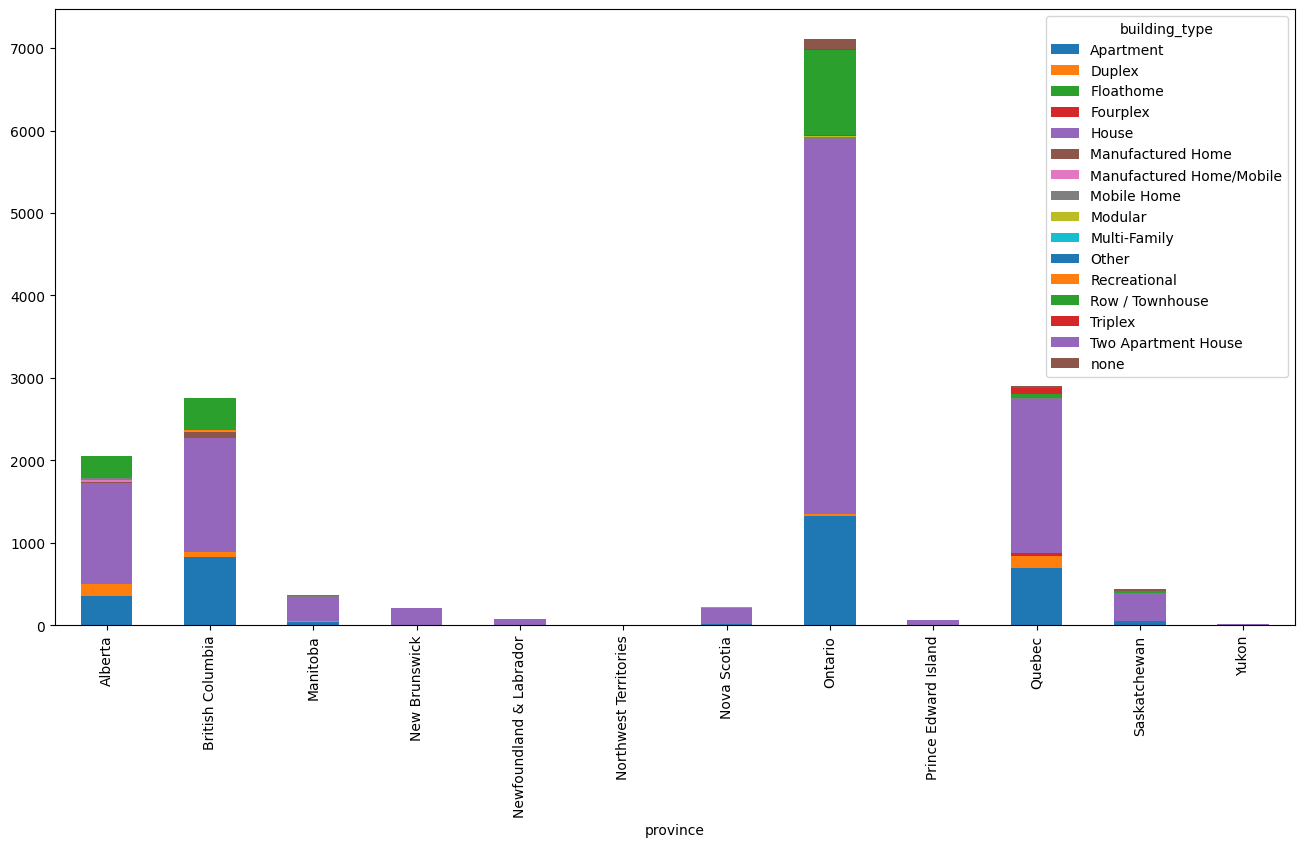

In [41]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

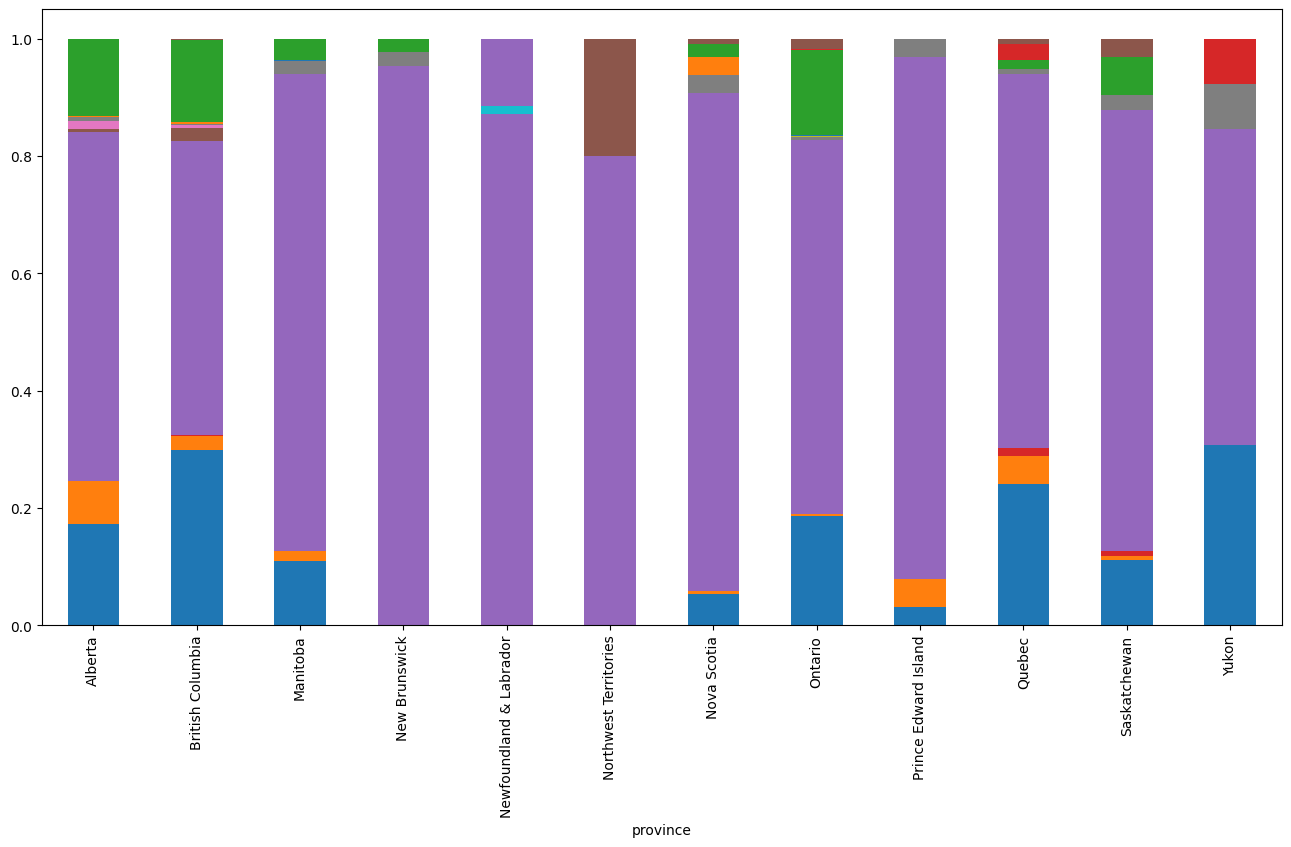

In [42]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [43]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,637,0,1307,0,7,0,0,0,0,0,0,0,0,0,102
British Columbia,0,43,0,1342,0,47,20,5,0,1,10,1232,5,0,6,50
Manitoba,0,1,0,301,56,4,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,3,0,142,0,4,0,0,0,0,0,0,0,0,0,65
Newfoundland & Labrador,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Nova Scotia,0,17,0,208,0,1,0,0,0,0,0,0,0,0,0,0
Ontario,391,1402,2,5041,0,43,2,0,5,2,9,0,3,0,0,217
Prince Edward Island,0,2,0,61,0,0,0,0,0,0,0,0,0,0,0,0


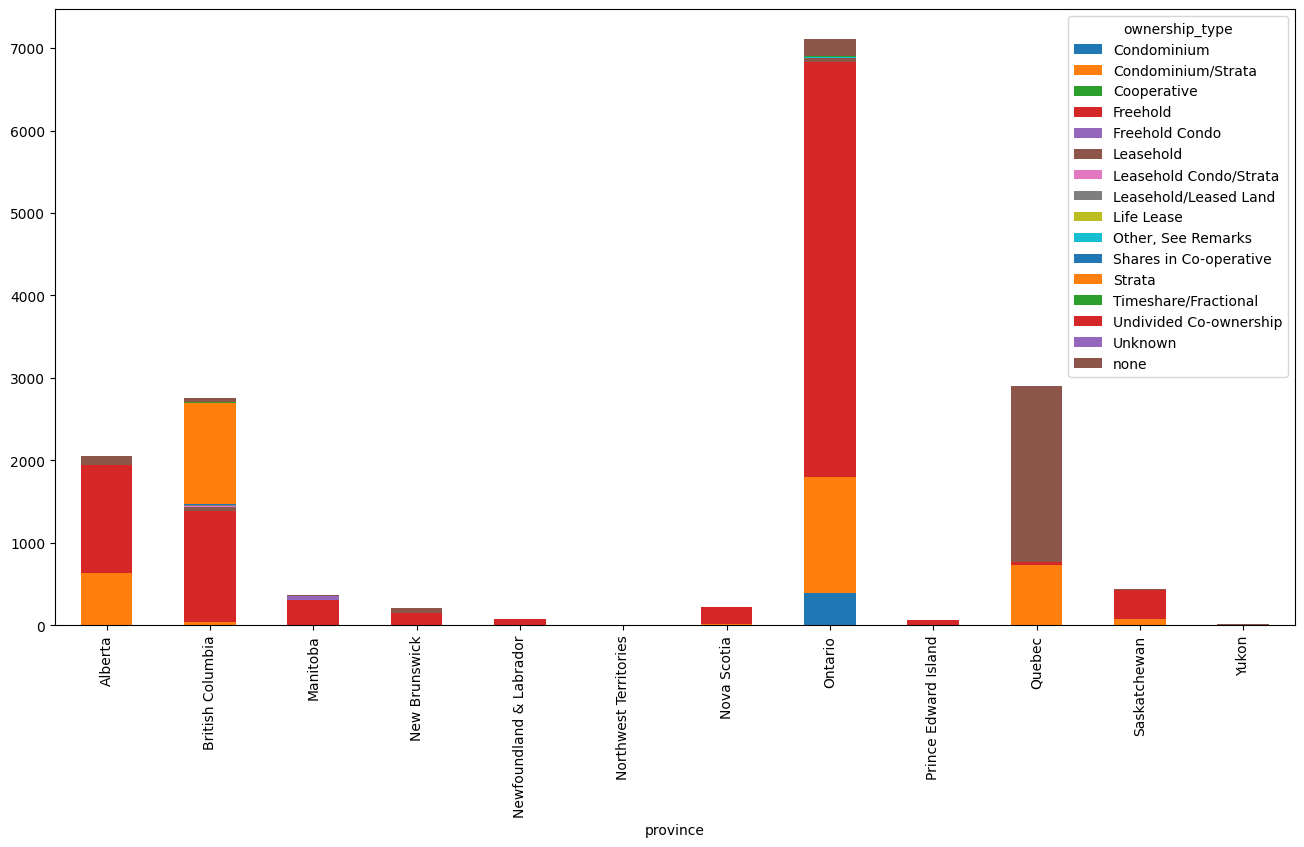

In [44]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

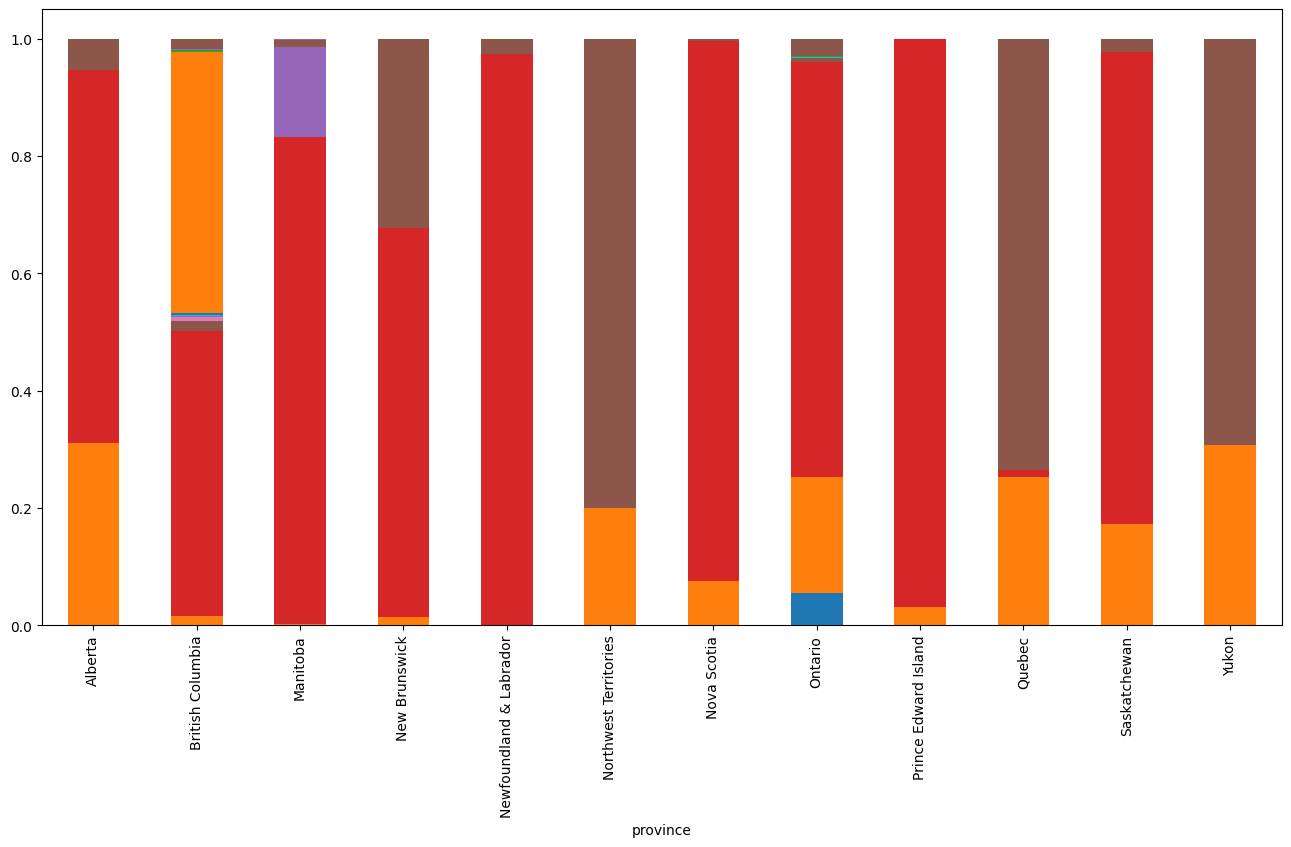

In [45]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [46]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2176
Strata                     759
Condominium                245
Freehold Condo              39
Undivided Co-ownership      31
Leasehold Condo/Strata      12
Shares in Co-operative      10
Freehold                     9
none                         8
Timeshare/Fractional         5
Life Lease                   4
Leasehold                    3
Cooperative                  1
Unknown                      1
Leasehold/Leased Land        1
Name: count, dtype: int64

In [47]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
none                  165
Freehold              162
Strata                 40
Condominium/Strata     31
Leasehold               1
Name: count, dtype: int64

In [48]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,,
Condominium,245,0,0,0,14,0,0,0,1,0,0,0,130,0,0,1
Condominium/Strata,2176,31,0,0,63,0,6,0,0,0,1,0,632,0,0,12
Cooperative,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Freehold,9,162,0,7,7875,7,33,30,3,1,3,8,642,5,9,33
Freehold Condo,39,0,0,0,7,0,0,0,0,0,1,0,9,0,0,0
Leasehold,3,1,1,0,32,26,4,34,9,0,0,1,2,0,0,3
Leasehold Condo/Strata,12,0,0,0,3,0,0,0,0,0,0,0,6,0,0,1
Leasehold/Leased Land,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
Life Lease,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


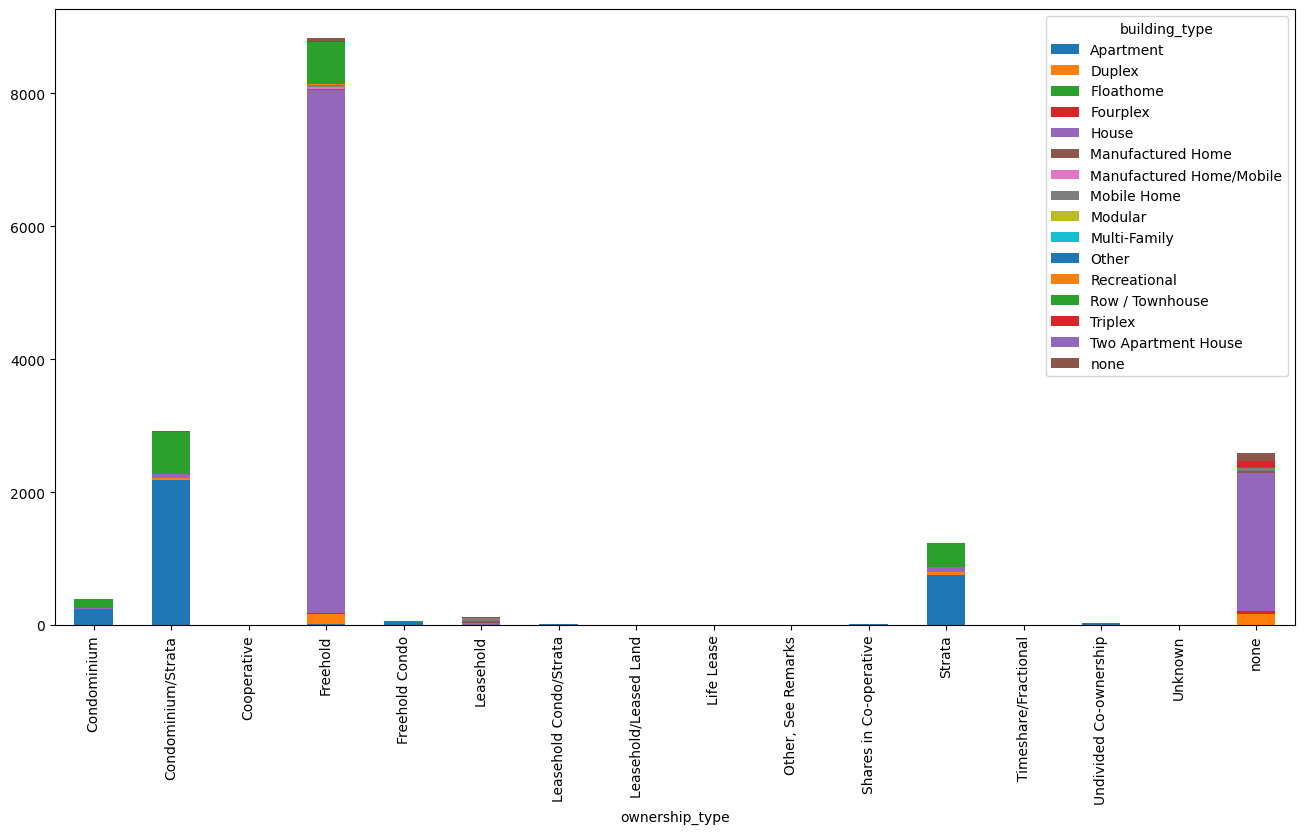

In [49]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

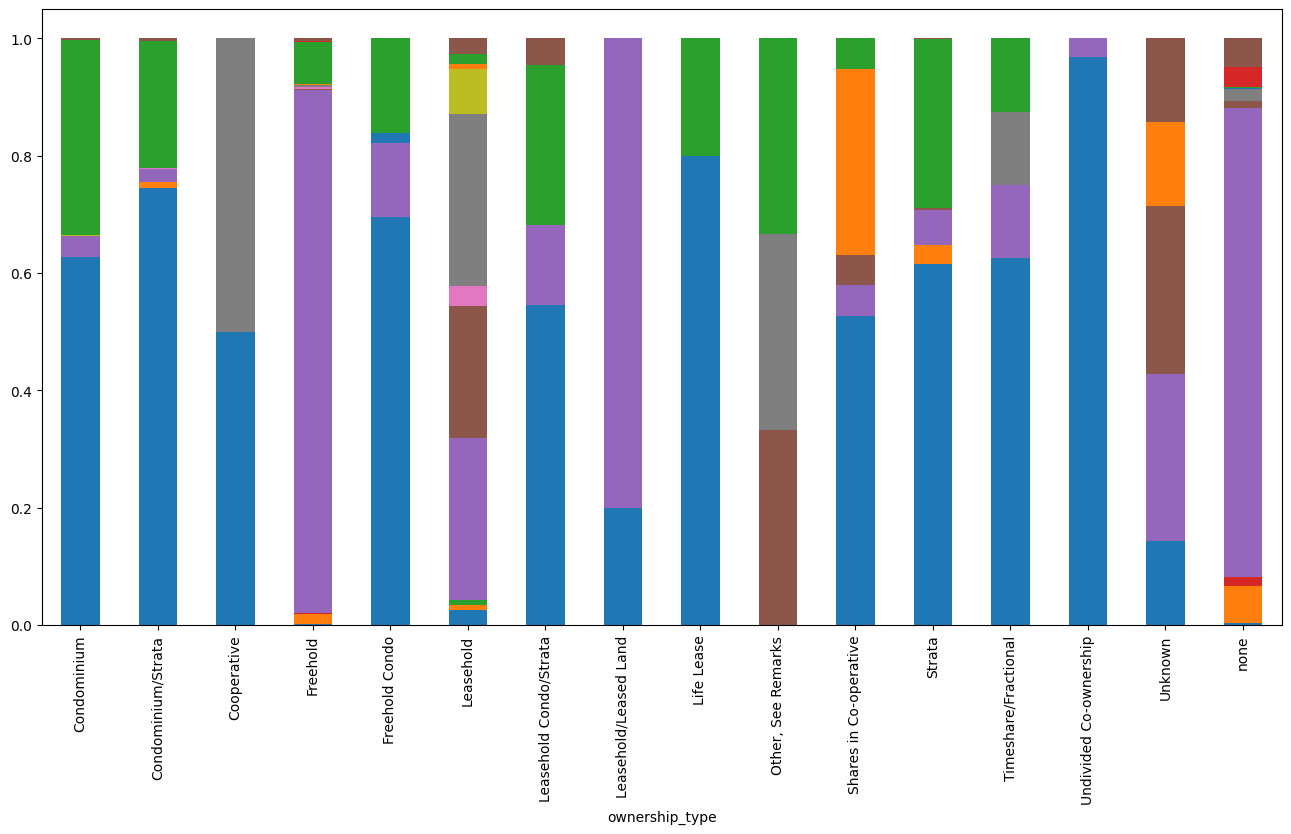

In [50]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [51]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,399.0,399.0,249.0,399.0,399.0,399.0,3.990000e+02,399.0
mean,26673803.0,2.0,2.0,-98.0,49.0,2.0,6.384717e+17,675177.0
std,7088.0,1.0,0.0,21.0,3.0,3.0,1.514769e+12,442094.0
min,26661729.0,0.0,1.0,-125.0,42.0,0.0,6.384690e+17,99900.0
25%,26667107.0,1.0,2.0,-114.0,46.0,0.0,6.384704e+17,399000.0
50%,26674028.0,2.0,2.0,-113.0,49.0,2.0,6.384717e+17,555000.0
75%,26680324.0,3.0,2.0,-74.0,51.0,4.0,6.384726e+17,798900.0
max,26685866.0,11.0,3.0,-62.0,57.0,20.0,6.384757e+17,3298000.0


In [52]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,93.0,93.0,44.0,93.0,93.0,93.0,9.300000e+01,93.0
mean,26673439.0,1.0,2.0,-77.0,46.0,3.0,6.384716e+17,818491.0
std,7097.0,1.0,1.0,12.0,2.0,3.0,1.498426e+12,404876.0
min,26661725.0,0.0,1.0,-135.0,43.0,0.0,6.384690e+17,79000.0
25%,26667011.0,1.0,2.0,-74.0,45.0,0.0,6.384703e+17,559000.0
50%,26674002.0,1.0,2.0,-74.0,46.0,3.0,6.384717e+17,799900.0
75%,26680162.0,1.0,3.0,-73.0,46.0,6.0,6.384726e+17,949900.0
max,26685690.0,7.0,3.0,-71.0,61.0,16.0,6.384755e+17,2639900.0


In [53]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,47.0,47.0,22.0,47.0,47.0,47.0,4.700000e+01,47.0
mean,26675550.0,2.0,2.0,-79.0,47.0,4.0,6.384721e+17,915451.0
std,7313.0,1.0,1.0,14.0,2.0,4.0,1.610708e+12,435873.0
min,26662078.0,1.0,1.0,-121.0,44.0,0.0,6.384693e+17,119000.0
25%,26669490.0,1.0,2.0,-76.0,46.0,0.0,6.384708e+17,597450.0
50%,26675089.0,1.0,2.0,-74.0,46.0,3.0,6.384718e+17,919000.0
75%,26682468.0,1.0,2.0,-73.0,47.0,5.0,6.384733e+17,1149500.0
max,26685502.0,8.0,3.0,-71.0,51.0,13.0,6.384753e+17,2499000.0


In [54]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,1783.0,1783.0,1330.0,1783.0,1783.0,1783.0,1.783000e+03,1783.0
mean,26674221.0,3.0,2.0,-94.0,46.0,2.0,6.384718e+17,740003.0
std,6730.0,1.0,1.0,19.0,4.0,1.0,1.428752e+12,388491.0
min,26661739.0,0.0,1.0,-129.0,42.0,0.0,6.384690e+17,99000.0
25%,26668482.0,2.0,2.0,-114.0,44.0,1.0,6.384707e+17,519995.0
50%,26674613.0,3.0,2.0,-80.0,44.0,2.0,6.384718e+17,699000.0
75%,26679844.0,3.0,3.0,-79.0,49.0,2.0,6.384726e+17,892950.0
max,26685979.0,10.0,26.0,-64.0,59.0,27.0,6.384757e+17,4685000.0


In [55]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       10145
Apartment                    3304
Row / Townhouse              1783
Semi-Detached                 539
none                          179
Mobile Home                   119
Manufactured Home              74
Manufactured Home/Mobile       43
Recreational                   16
Modular                        13
Other                           9
Two Apartment House             9
Multi-Family                    1
Floathome                       1
Name: count, dtype: int64

In [56]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              10145
Apartment           3304
Row / Townhouse     1783
Semi-Detached        539
Name: count, dtype: int64

In [57]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15771 entries, 0 to 18099
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15771 non-null  int64  
 1   id_mls                    15771 non-null  object 
 2   bathrooms_total           15771 non-null  int64  
 3   bedrooms                  15771 non-null  object 
 4   stories_total             11471 non-null  float64
 5   size_interior             9241 non-null   object 
 6   building_type             15771 non-null  object 
 7   agency_name               15771 non-null  object 
 8   agency_type               15771 non-null  object 
 9   property_type             15771 non-null  object 
 10  lng                       15771 non-null  float64
 11  lat                       15771 non-null  float64
 12  ownership_type            15771 non-null  object 
 13  ownership_type_group_ids  15771 non-null  object 
 14  land_size  

In [58]:
df_bt["province"].value_counts()

province
Ontario                    6926
Quebec                     2856
British Columbia           2664
Alberta                    1998
Saskatchewan                409
Manitoba                    354
Nova Scotia                 210
New Brunswick               209
Newfoundland & Labrador      68
Prince Edward Island         61
Yukon                        12
Northwest Territories         4
Name: count, dtype: int64

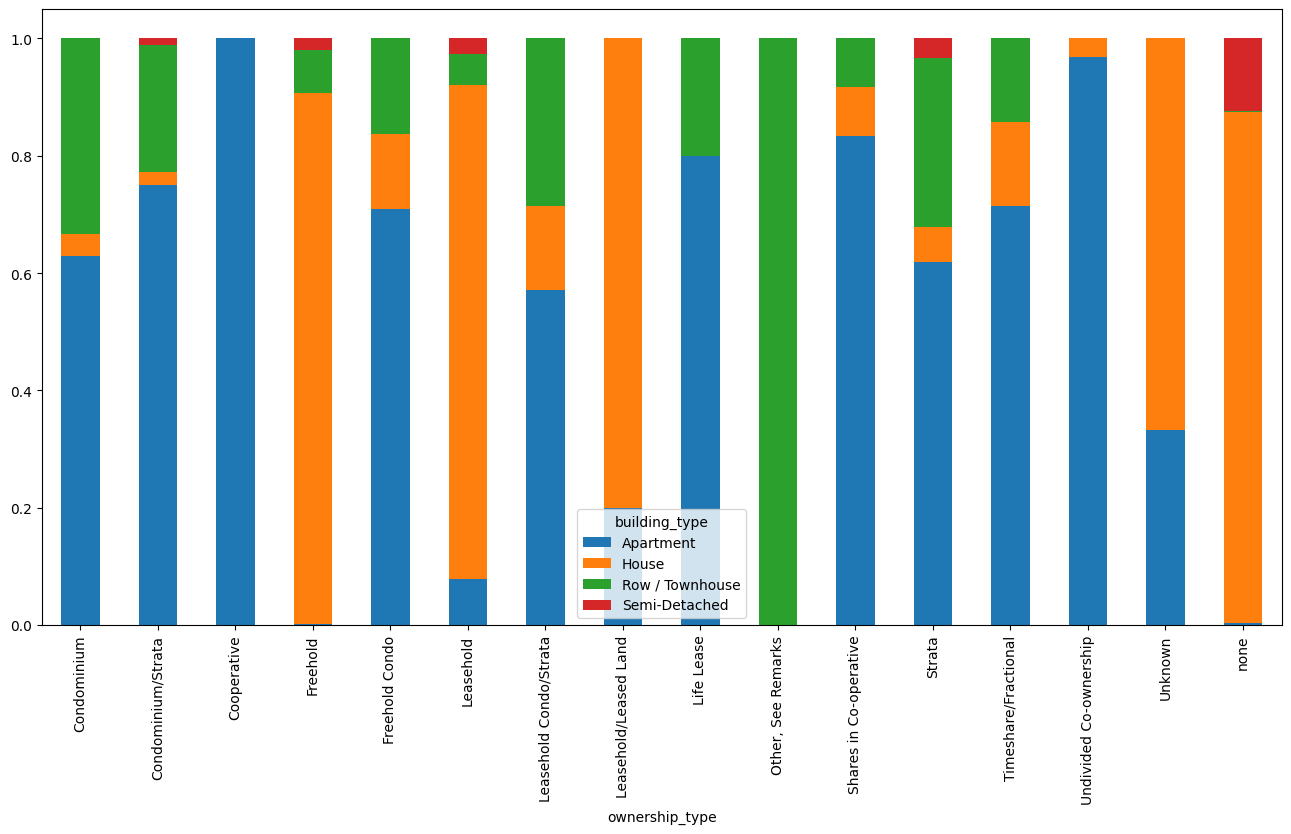

In [59]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [60]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          8700
2          4606
none       2375
4            43
1 2          32
3             7
2 3           5
1 2 3 4       3
Name: count, dtype: int64

In [61]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          7875
none       2069
2           161
4            36
1 2 3 4       2
3             1
1 2           1
Name: count, dtype: int64

In [62]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          3241
1 2          31
1             9
none          9
3             5
2 3           4
4             4
1 2 3 4       1
Name: count, dtype: int64

In [63]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    293
1       174
2        71
4         1
Name: count, dtype: int64

In [64]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1133
1        642
none       4
4          2
2 3        1
3          1
Name: count, dtype: int64

In [65]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,8700.0,8700.0,7079.0,8700.0,8700.0,8700.0,8.700000e+03,8700.0
mean,26674037.0,3.0,2.0,-92.0,47.0,3.0,6.384718e+17,1050869.0
std,6796.0,1.0,1.0,19.0,4.0,6.0,1.452420e+12,1089925.0
min,26661721.0,0.0,1.0,-130.0,42.0,0.0,6.384690e+17,1.0
25%,26668266.0,2.0,1.0,-114.0,44.0,0.0,6.384707e+17,549900.0
50%,26674222.0,3.0,2.0,-80.0,45.0,3.0,6.384717e+17,799900.0
75%,26679608.0,4.0,2.0,-79.0,50.0,5.0,6.384726e+17,1249000.0
max,26685985.0,23.0,4.0,-53.0,59.0,413.0,6.384757e+17,40561615.0


In [66]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2375.0,2375.0,2160.0,2375.0,2375.0,2375.0,2.375000e+03,2375.0
mean,26674341.0,2.0,2.0,-75.0,46.0,4.0,6.384718e+17,642860.0
std,7173.0,1.0,1.0,10.0,2.0,4.0,1.540548e+12,561939.0
min,26661725.0,0.0,1.0,-135.0,42.0,0.0,6.384690e+17,50000.0
25%,26668489.0,1.0,1.0,-74.0,45.0,2.0,6.384707e+17,375000.0
50%,26674538.0,2.0,2.0,-74.0,46.0,4.0,6.384717e+17,529500.0
75%,26681310.0,2.0,2.0,-72.0,47.0,6.0,6.384728e+17,749900.0
max,26685908.0,11.0,3.0,-53.0,62.0,47.0,6.384757e+17,13900000.0


In [67]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,2.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,26669267.0,2.0,2.0,-112.0,48.0,0.0,6.384707e+17,116671.0
std,4840.0,1.0,1.0,22.0,2.0,1.0,1.057520e+12,95983.0
min,26661835.0,1.0,1.0,-125.0,45.0,0.0,6.384691e+17,14900.0
25%,26667282.0,2.0,1.0,-125.0,47.0,0.0,6.384704e+17,64000.0
50%,26669490.0,2.0,2.0,-124.0,49.0,0.0,6.384708e+17,76900.0
75%,26670928.0,2.0,2.0,-102.0,50.0,0.0,6.384711e+17,156950.0
max,26677123.0,3.0,2.0,-80.0,50.0,2.0,6.384724e+17,283000.0


In [68]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,43.0,43.0,32.0,43.0,43.0,43.0,4.300000e+01,43.0
mean,26674889.0,1.0,1.0,-101.0,47.0,1.0,6.384720e+17,445453.0
std,7424.0,1.0,1.0,19.0,4.0,2.0,1.606225e+12,269576.0
min,26662115.0,0.0,1.0,-125.0,42.0,0.0,6.384693e+17,137500.0
25%,26668739.0,1.0,1.0,-122.0,44.0,0.0,6.384707e+17,199450.0
50%,26676011.0,1.0,1.0,-102.0,49.0,0.0,6.384723e+17,425000.0
75%,26682329.0,2.0,1.0,-82.0,49.0,0.0,6.384733e+17,547500.0
max,26685777.0,3.0,6.0,-67.0,55.0,7.0,6.384757e+17,1399900.0


In [69]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3.0,3.0,1.0,3.0,3.0,3.0,3.000000e+00,3.0
mean,26671490.0,1.0,1.0,-112.0,50.0,0.0,6.384713e+17,673300.0
std,7481.0,1.0,NaN,14.0,1.0,1.0,1.379253e+12,427553.0
min,26662936.0,1.0,1.0,-123.0,49.0,0.0,6.384698e+17,244900.0
25%,26668828.0,1.0,1.0,-120.0,50.0,0.0,6.384708e+17,459950.0
50%,26674719.0,1.0,1.0,-117.0,50.0,0.0,6.384718e+17,675000.0
75%,26675766.0,2.0,1.0,-107.0,51.0,0.0,6.384721e+17,887500.0
max,26676814.0,2.0,1.0,-96.0,51.0,1.0,6.384724e+17,1100000.0


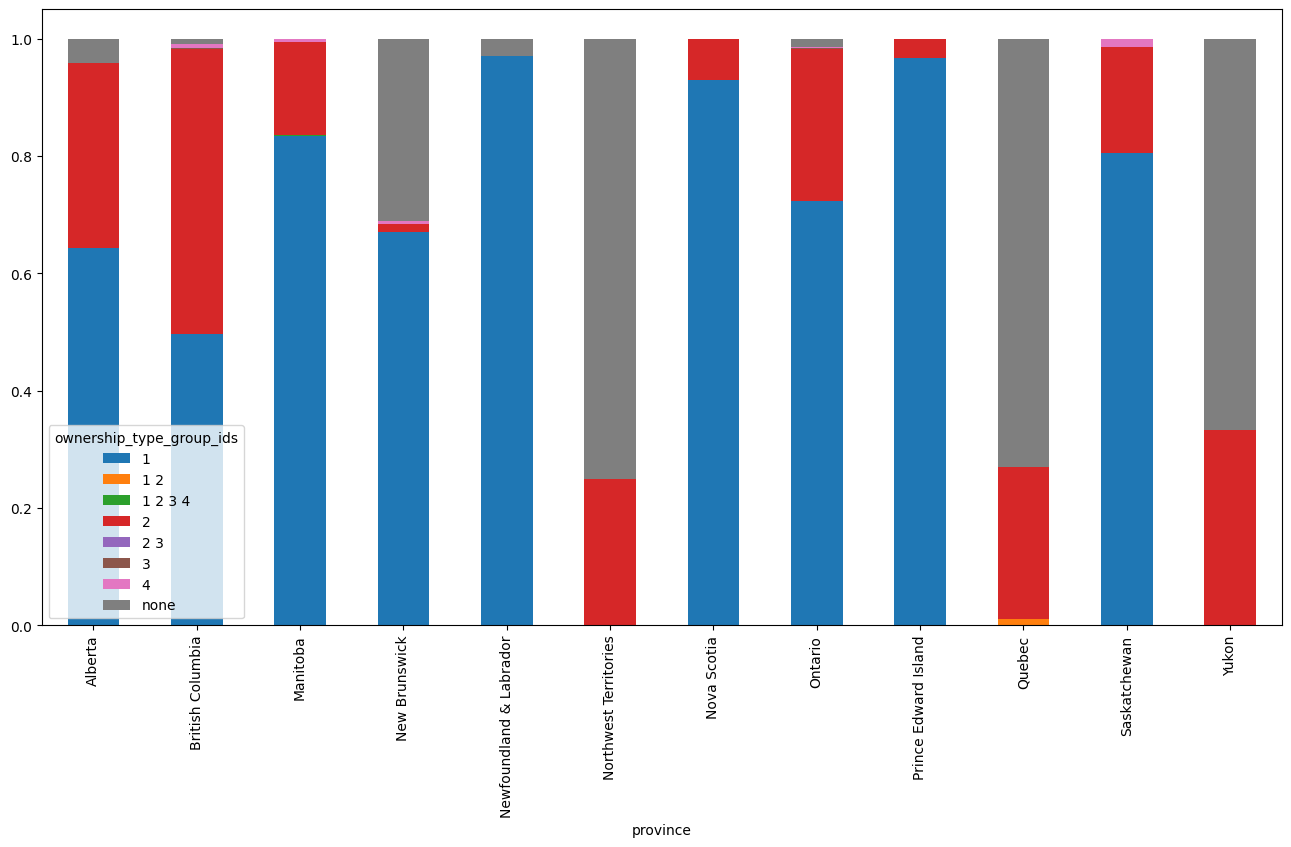

In [70]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [71]:
mask_other = (df_bt["ownership_type_group_ids"] == "none")
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          8700
2          4606
0          2375
4            43
1 2          32
3             7
2 3           5
1 2 3 4       3
Name: count, dtype: int64

In [72]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 3: Other

ownership_type_group_ids
1    8700
2    4606
0    2375
Name: count, dtype: int64

In [73]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15681 entries, 0 to 18099
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15681 non-null  int64  
 1   id_mls                    15681 non-null  object 
 2   bathrooms_total           15681 non-null  int64  
 3   bedrooms                  15681 non-null  object 
 4   stories_total             11403 non-null  float64
 5   size_interior             9161 non-null   object 
 6   building_type             15681 non-null  object 
 7   agency_name               15681 non-null  object 
 8   agency_type               15681 non-null  object 
 9   property_type             15681 non-null  object 
 10  lng                       15681 non-null  float64
 11  lat                       15681 non-null  float64
 12  ownership_type            15681 non-null  object 
 13  ownership_type_group_ids  15681 non-null  object 
 14  land_size  

In [74]:
df_oti_new["province"].value_counts()

province
Ontario                    6901
Quebec                     2824
British Columbia           2641
Alberta                    1998
Saskatchewan                403
Manitoba                    351
Nova Scotia                 210
New Brunswick               208
Newfoundland & Labrador      68
Prince Edward Island         61
Yukon                        12
Northwest Territories         4
Name: count, dtype: int64

In [75]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [76]:
df = df_oti_new

In [77]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7525/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    9724
True     5957
Name: count, dtype: int64

In [78]:
df.shape

(15681, 21)

In [79]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7525/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26684425,X8183992,3,3 + 2,2.0,NaN,House,NEW ERA REAL ESTATE,Firm,Single Family,...,42.260859,Freehold,1,60.44 x 100.4 FT,4,https://realtor.ca/real-estate/26684425/3627-d...,638474236193230000,N9E1T5,Ontario,950000.0
3,26683601,24006574,1,4 + 0,1.5,NaN,House,SAVE MAX WINCITY REALTY,Firm,Single Family,...,42.293044,Freehold,1,33X100,0,https://realtor.ca/real-estate/26683601/1134-f...,638473708207100000,N9C3L7,Ontario,279000.0
4,26682499,24006569,1,2 + 0,1.0,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.298873,Freehold,1,30X95,0,https://realtor.ca/real-estate/26682499/1679-h...,638473323441500000,N8X3R9,Ontario,149900.0
5,26681949,24006566,2,3 + 2,1.0,NaN,Semi-Detached,JUMP REALTY INC.,Firm,Single Family,...,42.265265,Freehold,1,60.24X111.45,0,https://realtor.ca/real-estate/26681949/3206-m...,638473215627600000,N9E2K2,Ontario,599900.0
6,26680208,24006480,2,3 + 0,NaN,NaN,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.315349,Freehold,1,50X122,0,https://realtor.ca/real-estate/26680208/1546-4...,638472602471400000,N9A6Z6,Ontario,599000.0


In [80]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7525/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [81]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [82]:
pd.DataFrame(bed_extra).value_counts()

0
0    2793
1    2092
2     893
3     156
4      20
5       3
Name: count, dtype: int64

In [83]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [84]:
len(bedrooms_extra)

15681

In [85]:
bedrooms_extra[:20]

['2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2']

In [86]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [87]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26684425,X8183992,2,3,3 + 2,2.0,NaN,House,NEW ERA REAL ESTATE,Firm,...,42.260859,Freehold,1,60.44 x 100.4 FT,4,https://realtor.ca/real-estate/26684425/3627-d...,638474236193230000,N9E1T5,Ontario,950000.0
1,26684416,X8183912,0,4,4,2.0,NaN,House,HOMELIFE 247 REALTY,Firm,...,42.237880,Freehold,1,59.06 x 119.75 FT,8,https://realtor.ca/real-estate/26684416/6268-d...,638474236178500000,N9H0E6,Ontario,1399999.0
3,26683601,24006574,0,1,4 + 0,1.5,NaN,House,SAVE MAX WINCITY REALTY,Firm,...,42.293044,Freehold,1,33X100,0,https://realtor.ca/real-estate/26683601/1134-f...,638473708207100000,N9C3L7,Ontario,279000.0
4,26682499,24006569,0,1,2 + 0,1.0,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.298873,Freehold,1,30X95,0,https://realtor.ca/real-estate/26682499/1679-h...,638473323441500000,N8X3R9,Ontario,149900.0
5,26681949,24006566,2,2,3 + 2,1.0,NaN,Semi-Detached,JUMP REALTY INC.,Firm,...,42.265265,Freehold,1,60.24X111.45,0,https://realtor.ca/real-estate/26681949/3206-m...,638473215627600000,N9E2K2,Ontario,599900.0
6,26680208,24006480,0,2,3 + 0,NaN,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.315349,Freehold,1,50X122,0,https://realtor.ca/real-estate/26680208/1546-4...,638472602471400000,N9A6Z6,Ontario,599000.0
7,26680206,24006548,0,2,3 + 0,NaN,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.293998,Freehold,1,50X122,0,https://realtor.ca/real-estate/26680206/1552-1...,638472602458930000,N9B3P1,Ontario,599000.0
8,26679420,24006550,1,2,2 + 1,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.296521,Freehold,1,39.99X107,0,https://realtor.ca/real-estate/26679420/2214-w...,638472568627230000,N8W2E9,Ontario,288000.0
10,26677825,24006526,1,4,3 + 1,2.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.098977,Freehold,1,37.14XIRREG,0,https://realtor.ca/real-estate/26677825/210-cr...,638472460990300000,N9V4A6,Ontario,999900.0
11,26677819,24006531,0,2,3 + 0,1.0,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.136113,Freehold,1,51.8X122.9 FT,0,https://realtor.ca/real-estate/26677819/203-ba...,638472460949400000,N9V0A9,Ontario,659900.0


In [88]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_7525/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15681 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15681 non-null  int64  
 1   id_mls                    15681 non-null  object 
 2   bedrooms_extra            15681 non-null  object 
 3   bathrooms_total           15681 non-null  int64  
 4   bedrooms                  15681 non-null  object 
 5   stories_total             11403 non-null  float64
 6   size_interior             9161 non-null   object 
 7   building_type             15681 non-null  object 
 8   agency_name               15681 non-null  object 
 9   agency_type               15681 non-null  object 
 10  property_type             15681 non-null  object 
 11  lng                       15681 non-null  float64
 12  lat                       15681 non-null  float64
 13  ownership_type            15681 non-null  object 
 14  ownership_t

In [90]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_7525/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [91]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26684425,X8183992,2,3,3,2.0,NaN,House,NEW ERA REAL ESTATE,Firm,...,42.260859,Freehold,1,60.44 x 100.4 FT,4,https://realtor.ca/real-estate/26684425/3627-d...,638474236193230000,N9E1T5,Ontario,950000.0
1,26684416,X8183912,0,4,4,2.0,NaN,House,HOMELIFE 247 REALTY,Firm,...,42.237880,Freehold,1,59.06 x 119.75 FT,8,https://realtor.ca/real-estate/26684416/6268-d...,638474236178500000,N9H0E6,Ontario,1399999.0
3,26683601,24006574,0,1,4,1.5,NaN,House,SAVE MAX WINCITY REALTY,Firm,...,42.293044,Freehold,1,33X100,0,https://realtor.ca/real-estate/26683601/1134-f...,638473708207100000,N9C3L7,Ontario,279000.0
4,26682499,24006569,0,1,2,1.0,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.298873,Freehold,1,30X95,0,https://realtor.ca/real-estate/26682499/1679-h...,638473323441500000,N8X3R9,Ontario,149900.0
5,26681949,24006566,2,2,3,1.0,NaN,Semi-Detached,JUMP REALTY INC.,Firm,...,42.265265,Freehold,1,60.24X111.45,0,https://realtor.ca/real-estate/26681949/3206-m...,638473215627600000,N9E2K2,Ontario,599900.0
6,26680208,24006480,0,2,3,NaN,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.315349,Freehold,1,50X122,0,https://realtor.ca/real-estate/26680208/1546-4...,638472602471400000,N9A6Z6,Ontario,599000.0
7,26680206,24006548,0,2,3,NaN,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.293998,Freehold,1,50X122,0,https://realtor.ca/real-estate/26680206/1552-1...,638472602458930000,N9B3P1,Ontario,599000.0
8,26679420,24006550,1,2,2,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.296521,Freehold,1,39.99X107,0,https://realtor.ca/real-estate/26679420/2214-w...,638472568627230000,N8W2E9,Ontario,288000.0
10,26677825,24006526,1,4,3,2.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.098977,Freehold,1,37.14XIRREG,0,https://realtor.ca/real-estate/26677825/210-cr...,638472460990300000,N9V4A6,Ontario,999900.0
11,26677819,24006531,0,2,3,1.0,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.136113,Freehold,1,51.8X122.9 FT,0,https://realtor.ca/real-estate/26677819/203-ba...,638472460949400000,N9V0A9,Ontario,659900.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15681 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15681 non-null  int64  
 1   id_mls                    15681 non-null  object 
 2   bedrooms_extra            15681 non-null  int64  
 3   bathrooms_total           15681 non-null  int64  
 4   bedrooms                  15681 non-null  int64  
 5   stories_total             11403 non-null  float64
 6   size_interior             9161 non-null   object 
 7   building_type             15681 non-null  object 
 8   agency_name               15681 non-null  object 
 9   agency_type               15681 non-null  object 
 10  property_type             15681 non-null  object 
 11  lng                       15681 non-null  float64
 12  lat                       15681 non-null  float64
 13  ownership_type            15681 non-null  object 
 14  ownership_t

## Handling Storeys

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15681 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15681 non-null  int64  
 1   id_mls                    15681 non-null  object 
 2   bedrooms_extra            15681 non-null  int64  
 3   bathrooms_total           15681 non-null  int64  
 4   bedrooms                  15681 non-null  int64  
 5   stories_total             11403 non-null  float64
 6   size_interior             9161 non-null   object 
 7   building_type             15681 non-null  object 
 8   agency_name               15681 non-null  object 
 9   agency_type               15681 non-null  object 
 10  property_type             15681 non-null  object 
 11  lng                       15681 non-null  float64
 12  lat                       15681 non-null  float64
 13  ownership_type            15681 non-null  object 
 14  ownership_t

In [94]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26684425,X8183992,2,3,3,2.0,NaN,House,NEW ERA REAL ESTATE,Firm,...,42.260859,Freehold,1,60.44 x 100.4 FT,4,https://realtor.ca/real-estate/26684425/3627-d...,638474236193230000,N9E1T5,Ontario,950000.0
1,26684416,X8183912,0,4,4,2.0,NaN,House,HOMELIFE 247 REALTY,Firm,...,42.237880,Freehold,1,59.06 x 119.75 FT,8,https://realtor.ca/real-estate/26684416/6268-d...,638474236178500000,N9H0E6,Ontario,1399999.0
3,26683601,24006574,0,1,4,1.5,NaN,House,SAVE MAX WINCITY REALTY,Firm,...,42.293044,Freehold,1,33X100,0,https://realtor.ca/real-estate/26683601/1134-f...,638473708207100000,N9C3L7,Ontario,279000.0
4,26682499,24006569,0,1,2,1.0,NaN,House,NU STREAM REALTY (TORONTO) INC,Firm,...,42.298873,Freehold,1,30X95,0,https://realtor.ca/real-estate/26682499/1679-h...,638473323441500000,N8X3R9,Ontario,149900.0
5,26681949,24006566,2,2,3,1.0,NaN,Semi-Detached,JUMP REALTY INC.,Firm,...,42.265265,Freehold,1,60.24X111.45,0,https://realtor.ca/real-estate/26681949/3206-m...,638473215627600000,N9E2K2,Ontario,599900.0


In [95]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      4176
1.50       411
1.75        36
2.00      5328
2.50        91
3.00       767
4.00       237
5.00        42
6.00        62
7.00        21
8.00        26
9.00        19
10.00       13
11.00        7
12.00       10
13.00        2
14.00       10
15.00       16
16.00        5
17.00        8
18.00        8
19.00        9
20.00       11
21.00        3
22.00        5
23.00        5
24.00        7
25.00        4
26.00        5
27.00        3
28.00        6
29.00        3
30.00        5
31.00        1
32.00        2
33.00        1
34.00        3
35.00        3
36.00        5
37.00        1
38.00        3
39.00        3
40.00        4
42.00        1
44.00        4
46.00        1
50.00        1
52.00        1
54.00        3
55.00        1
57.00        3
191.00       1
Name: count, dtype: int64

In [96]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4176
1.50      411
1.75       36
2.00     5328
2.50       91
3.00      767
4.00      237
5.00       42
6.00       62
7.00       21
8.00       26
9.00       19
10.00      13
11.00       7
12.00      10
13.00       2
14.00      10
15.00      16
16.00       5
17.00       8
Name: count, dtype: int64

In [97]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [98]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [99]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [100]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          1903
House              1699
Row / Townhouse     452
Semi-Detached       224
Name: count, dtype: int64

In [101]:
df[df["stories_total"].isna()]["page_url"]

6        https://realtor.ca/real-estate/26680208/1546-4...
7        https://realtor.ca/real-estate/26680206/1552-1...
14       https://realtor.ca/real-estate/26676643/2600-s...
17       https://realtor.ca/real-estate/26676044/475-hu...
25       https://realtor.ca/real-estate/26675612/648-li...
                               ...                        
18094    https://realtor.ca/real-estate/26662779/205-25...
18096    https://realtor.ca/real-estate/26674706/b-12-p...
18097    https://realtor.ca/real-estate/26673218/27-ryc...
18098    https://realtor.ca/real-estate/26670055/3524-m...
18099    https://realtor.ca/real-estate/26665041/100-49...
Name: page_url, Length: 4278, dtype: object

In [102]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15681 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15681 non-null  int64  
 1   id_mls                    15681 non-null  object 
 2   bedrooms_extra            15681 non-null  int64  
 3   bathrooms_total           15681 non-null  int64  
 4   bedrooms                  15681 non-null  int64  
 5   stories_total             15681 non-null  float64
 6   size_interior             9161 non-null   object 
 7   building_type             15681 non-null  object 
 8   agency_name               15681 non-null  object 
 9   agency_type               15681 non-null  object 
 10  property_type             15681 non-null  object 
 11  lng                       15681 non-null  float64
 12  lat                       15681 non-null  float64
 13  ownership_type            15681 non-null  object 
 14  ownership_t

In [103]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     8454
2.00     5328
3.00      767
1.50      411
4.00      237
2.50       91
6.00       62
5.00       42
1.75       36
8.00       26
7.00       21
9.00       19
15.00      16
10.00      13
20.00      11
12.00      10
14.00      10
19.00       9
17.00       8
18.00       8
Name: count, dtype: int64

In [104]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

202      https://realtor.ca/real-estate/26669084/739-br...
205      https://realtor.ca/real-estate/26669082/741-br...
421      https://realtor.ca/real-estate/26676573/301-ca...
424      https://realtor.ca/real-estate/26676512/305-15...
474      https://realtor.ca/real-estate/26672644/3380-s...
                               ...                        
17999    https://realtor.ca/real-estate/26671240/7511-2...
18000    https://realtor.ca/real-estate/26670816/8912-1...
18002    https://realtor.ca/real-estate/26670049/11115-...
18026    https://realtor.ca/real-estate/26684666/10-313...
18075    https://realtor.ca/real-estate/26664426/48-532...
Name: page_url, Length: 767, dtype: object

In [105]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec              550
Alberta             221
British Columbia    114
Ontario              55
Saskatchewan          1
Name: count, dtype: int64

In [106]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

468      https://realtor.ca/real-estate/26673180/141-co...
499      https://realtor.ca/real-estate/26671874/1172-h...
601      https://realtor.ca/real-estate/26664489/130-wi...
1185     https://realtor.ca/real-estate/26684850/411-ke...
1208     https://realtor.ca/real-estate/26684246/230-bl...
                               ...                        
18040    https://realtor.ca/real-estate/26677930/2402-3...
18054    https://realtor.ca/real-estate/26670865/411-24...
18056    https://realtor.ca/real-estate/26670048/3607-1...
18059    https://realtor.ca/real-estate/26666959/307-11...
18062    https://realtor.ca/real-estate/26664738/307-10...
Name: page_url, Length: 941, dtype: object

In [107]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
3        False
4        False
5        False
         ...  
18094    False
18096    False
18097    False
18098    False
18099    False
Length: 15681, dtype: bool

In [108]:
~mask_apt_storey

0        True
1        True
3        True
4        True
5        True
         ... 
18094    True
18096    True
18097    True
18098    True
18099    True
Length: 15681, dtype: bool

In [109]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [110]:
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [111]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     8454
2.00     5226
3.00      516
1.50      410
2.50       91
1.75       36
4.00        5
26.00       1
6.00        1
Name: count, dtype: int64

In [112]:
df_storey["stories_total"].unique()

array([ 2.  ,  1.5 ,  1.  ,  1.75,  2.5 ,  3.  , 26.  ,  6.  ,  4.  ])

In [113]:
df = df_storey

## Handling Interior Size (Phase 1)

### First Looks

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   object 
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [115]:
df["size_interior"].value_counts()

size_interior
1100.0000    25
1200 sqft    23
1200.0000    22
1040 sqft    20
1000.0000    19
             ..
4300 sqft     1
473 sqft      1
737 sqft      1
923.0000      1
2725 sqft     1
Name: count, Length: 5089, dtype: int64

In [116]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14,26676643,24006517,0,2,2,1.0,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26676643/2600-s...,638472387440470000,N9J2J7,Ontario,549900.0
24,26675611,24006484,0,2,2,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.269997,none,0,38XIRREG,0,https://realtor.ca/real-estate/26675611/648-li...,638472279450770000,N6E3N7,Ontario,849900.0
25,26675612,24006482,0,2,2,1.0,1704.0000,Row / Townhouse,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.269997,Condominium/Strata,2,38XIRREG,0,https://realtor.ca/real-estate/26675612/648-li...,638472279454170000,N6E3N7,Ontario,849900.0
28,26673597,24006469,0,1,3,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26673597/35-ber...,638471638779400000,N9V2W7,Ontario,384900.0
46,26669088,24006342,0,3,3,1.0,1613.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26669088/7333-m...,638470731549400000,N9H0P4,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18094,26662779,15488,0,1,2,1.0,940 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.778391,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26662779/205-25...,638469736892700000,Y1A5W5,Yukon,386900.0
18096,26674706,5725,0,2,3,1.0,2659 sqft,House,CENTURY 21 Prospect Realty,Firm,...,62.496554,none,0,40000,0,https://realtor.ca/real-estate/26674706/b-12-p...,638471773455470000,NaN,Northwest Territories,494900.0
18097,26673218,5724,0,3,5,1.0,1262 sqft,House,CENTURY 21 Prospect Realty,Firm,...,62.445711,none,0,6603,0,https://realtor.ca/real-estate/26673218/27-ryc...,638471589364100000,NaN,Northwest Territories,629900.0
18098,26670055,5723,0,3,5,1.0,2725 sqft,House,RE/MAX North of 60,Firm,...,62.465188,none,0,5845,0,https://realtor.ca/real-estate/26670055/3524-m...,638470815350630000,NaN,Northwest Territories,794000.0


In [117]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14,26676643,24006517,0,2,2,1.0,1124.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26676643/2600-s...,638472387440470000,N9J2J7,Ontario,549900.0
24,26675611,24006484,0,2,2,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.269997,none,0,38XIRREG,0,https://realtor.ca/real-estate/26675611/648-li...,638472279450770000,N6E3N7,Ontario,849900.0
25,26675612,24006482,0,2,2,1.0,1704.0000,Row / Townhouse,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.269997,Condominium/Strata,2,38XIRREG,0,https://realtor.ca/real-estate/26675612/648-li...,638472279454170000,N6E3N7,Ontario,849900.0
28,26673597,24006469,0,1,3,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26673597/35-ber...,638471638779400000,N9V2W7,Ontario,384900.0
46,26669088,24006342,0,3,3,1.0,1613.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26669088/7333-m...,638470731549400000,N9H0P4,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,26662689,40560941,0,1,2,1.0,950.0000,Apartment,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.334093,Condominium,2,NaN,0,https://realtor.ca/real-estate/26662689/955-st...,638469717838470000,P1B9G3,Ontario,299900.0
10387,26662652,40556927,0,2,3,1.0,1063.0000,House,REALTY EXECUTIVES Local Group Inc. Brokerage,Firm,...,46.187474,Freehold,1,under 1/2 acre,6,https://realtor.ca/real-estate/26662652/1080-h...,638469705878000000,P0H1H0,Ontario,449900.0
10390,26673455,40562534,0,1,2,1.0,870.0000,House,"Keller Williams Experience Realty, Brokerage (...",Firm,...,46.310255,Freehold,1,2.863 ac|2 - 4.99 acres,6,https://realtor.ca/real-estate/26673455/4247-h...,638471623038530000,P0H1V0,Ontario,329900.0
10393,26664748,40561447,0,1,3,1.5,986.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.312313,Freehold,1,0.05 ac|under 1/2 acre,0,https://realtor.ca/real-estate/26664748/580-mc...,638469915947100000,P0H1V0,Ontario,179900.0


In [118]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14331,26672849,2475723,0,1,1,1.0,632.0000,Apartment,Royal LePage East Kootenay Realty,Firm,...,49.522503,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26672849/206b-2...,638471558161130000,V1C5T5,Alberta,179900.0
14347,26682796,A2118353,0,1,3,1.0,904 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.634352,Freehold,1,"6000 sqft|4,051 - 7,250 sqft",1,https://realtor.ca/real-estate/26682796/6949-1...,638473398061100000,T0K0M0,Alberta,373000.0
14352,26668417,A2117366,1,2,2,1.0,1066 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.585288,Freehold,1,"16553 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",4,https://realtor.ca/real-estate/26668417/2134-2...,638470690478570000,T0K0C0,Alberta,400000.0
14361,26679266,A2118520,0,4,5,1.0,1342 sqft,House,RE/MAX CARDSTON REALTY,Firm,...,49.200819,Freehold,1,"10160 sqft|7,251 - 10,889 sqft",2,https://realtor.ca/real-estate/26679266/195-7-...,638472544608600000,T0K0K0,Alberta,285000.0
14362,26676822,A2118293,0,3,3,1.0,1344 sqft,House,RE/MAX REAL ESTATE - LETHBRIDGE,Firm,...,49.488820,Freehold,1,"12607 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",4,https://realtor.ca/real-estate/26676822/1119-c...,638472406472270000,T0K1W0,Alberta,299000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18068,26662220,A2117338,1,3,2,1.0,1398 sqft,Semi-Detached,ROYAL LEPAGE BENCHMARK,Firm,...,56.729003,Condominium/Strata,2,"0.00|0-4,050 sqft",3,https://realtor.ca/real-estate/26662220/13-264...,638469356100400000,T9H5J5,Alberta,359900.0
18069,26661800,A2117258,1,4,3,2.0,1733 sqft,House,EXP REALTY,Firm,...,56.764197,Freehold,1,"5481.16 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26661800/434-pa...,638469050114400000,T9K0B5,Alberta,564900.0
18078,26680456,A2117766,0,1,3,1.0,1126 sqft,House,RE/MAX Grande Prairie,Firm,...,58.504772,Freehold,1,"1083 sqft|0-4,050 sqft",4,https://realtor.ca/real-estate/26680456/16-dis...,638472645013030000,T0H2Y0,Alberta,57000.0
18080,26674040,A2118057,0,4,4,2.0,1986 sqft,House,RE/MAX Grande Prairie,Firm,...,58.182491,Freehold,1,1.29 ac|1 - 1.99 acres,10,https://realtor.ca/real-estate/26674040/9202-9...,638471677831770000,T0H2H0,Alberta,499900.0


In [119]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7089,26681854,25853228,0,2,2,1.0,1360 sqft,House,VIA CAPITALE DIAMANT - Gatineau,Firm,...,45.807297,none,0,3.34 ac,4,https://realtor.ca/real-estate/26681854/33-ch-...,638473185437470000,J0X1M0,Quebec,508000.0
7102,26677917,22015913,0,2,4,1.0,2856 sqft,House,VIA CAPITALE DIAMANT - Gatineau,Firm,...,45.996176,none,0,2215.6 m2,10,https://realtor.ca/real-estate/26677917/219-ch...,638472468066970000,J0X2Z0,Quebec,1200000.0
7134,26684469,26908403,0,2,5,2.0,1492 sqft,House,Royal LePage Vallée de l'Outaouais - Aylmer,Firm,...,45.849777,none,0,2469.4 m2,10,https://realtor.ca/real-estate/26684469/119-ch...,638474265371270000,J0X2P0,Quebec,799000.0
7135,26684255,10903995,0,2,2,2.0,3890 sqft,House,GAUVIN IMMOBILIER INC.,Firm,...,45.730951,none,0,8385.3 m2,5,https://realtor.ca/real-estate/26684255/129-ch...,638474192732970000,J0X1A0,Quebec,550000.0
7139,26683587,21217966,0,1,2,1.0,560 sqft,House,GAUVIN IMMOBILIER INC.,Firm,...,45.836742,none,0,21229.65 sqft,6,https://realtor.ca/real-estate/26683587/36-ch-...,638473688705330000,J0X2P0,Quebec,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,26674792,20422612,0,2,4,1.0,1052 sqft,House,CYNTHIA BERNIER,Firm,...,49.055369,none,0,7500 sqft,6,https://realtor.ca/real-estate/26674792/99-rue...,638471782277970000,J0Y1X0,Quebec,150000.0
14821,26684712,24087175,0,2,4,2.0,3516.57 sqft,House,VIA CAPITALE SAGUENAY LAC ST-JEAN,Firm,...,49.804526,none,0,4012 m2,1,https://realtor.ca/real-estate/26684712/12-che...,638474372641830000,G8P2X9,Quebec,595000.0
14828,26665431,22300481,0,2,3,1.0,980 sqft,House,RE/MAX DISTINCTION,Firm,...,49.072153,none,0,9978 sqft,7,https://realtor.ca/real-estate/26665431/678-ro...,638470013384930000,G0H1S0,Quebec,239900.0
14830,26685392,13783829,0,1,4,2.0,1486.5 sqft,House,VIA CAPITALE HORIZON - Baie-Comeau,Firm,...,49.292889,none,0,979.7 m2,3,https://realtor.ca/real-estate/26685392/5-rue-...,638475184447500000,G0H1E0,Quebec,99750.0


### m2 to sqft

In [120]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_7525/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7904,26684076,19833029,0,1,4,1.0,94 m2,House,ROYAL LEPAGE DU QUARTIER,Firm,...,45.399565,none,0,5999.8 sqft,3,https://realtor.ca/real-estate/26684076/69-rue...,638474149200530000,J7V6K8,Quebec,499000.0
8225,26685419,28545065,0,2,4,2.0,185.25 m2,House,GROUPE SUTTON ACTIF,Firm,...,45.364144,none,0,275 m2,2,https://realtor.ca/real-estate/26685419/239b-r...,638475188510800000,J5A2A4,Quebec,599900.0
8227,26685416,27258261,0,2,4,2.0,177.63 m2,House,GROUPE SUTTON ACTIF,Firm,...,45.364261,none,0,267.3 m2,2,https://realtor.ca/real-estate/26685416/239-ru...,638475188193400000,J5A2A4,Quebec,499900.0
8308,26684640,20284231,0,2,3,1.0,113.6 m2,Apartment,RE/MAX 3000 INC.,Firm,...,45.315376,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26684640/705-ru...,638474328831000000,J6R0K8,Quebec,415000.0
8574,26681334,20765912,0,2,4,1.0,174.8 m2,Row / Townhouse,GROUPE SUTTON - CENTRE OUEST INC.,Firm,...,45.431202,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26681334/1002-r...,638472787614400000,H8N0G3,Quebec,999000.0


In [121]:
df[contains_meters]["province"].value_counts()

province
Alberta             862
Quebec               32
British Columbia     13
Name: count, dtype: int64

In [122]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7904,26684076,19833029,0,1,4,1.0,1011.816,House,ROYAL LEPAGE DU QUARTIER,Firm,...,45.399565,none,0,5999.8 sqft,3,https://realtor.ca/real-estate/26684076/69-rue...,638474149200530000,J7V6K8,Quebec,499000.0
8225,26685419,28545065,0,2,4,2.0,1994.031,House,GROUPE SUTTON ACTIF,Firm,...,45.364144,none,0,275 m2,2,https://realtor.ca/real-estate/26685419/239b-r...,638475188510800000,J5A2A4,Quebec,599900.0
8227,26685416,27258261,0,2,4,2.0,1912.00932,House,GROUPE SUTTON ACTIF,Firm,...,45.364261,none,0,267.3 m2,2,https://realtor.ca/real-estate/26685416/239-ru...,638475188193400000,J5A2A4,Quebec,499900.0
8308,26684640,20284231,0,2,3,1.0,1222.7904,Apartment,RE/MAX 3000 INC.,Firm,...,45.315376,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26684640/705-ru...,638474328831000000,J6R0K8,Quebec,415000.0
8574,26681334,20765912,0,2,4,1.0,1881.5472,Row / Townhouse,GROUPE SUTTON - CENTRE OUEST INC.,Firm,...,45.431202,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26681334/1002-r...,638472787614400000,H8N0G3,Quebec,999000.0


In [123]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_7525/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
447,26674764,24006478,0,2,3,1.5,1664 sqft,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.450864,Freehold,1,200X483|1 - 3 acres,0,https://realtor.ca/real-estate/26674764/14594-...,638471780729270000,N0L1X0,Ontario,599000.0
461,26673550,24006468,2,1,2,1.0,1364 sqft,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.444866,Freehold,1,80.78X|under 1/2 acre,0,https://realtor.ca/real-estate/26673550/133-ma...,638471636813400000,N0P2C0,Ontario,389900.0
658,26681960,H4189069,1,3,2,1.0,1190 sqft,Row / Townhouse,Keller Williams Complete Realty,Firm,...,42.968102,Freehold,1,25.66 x 101.18|under 1/2 acre,2,https://realtor.ca/real-estate/26681960/6-emil...,638473216277970000,N0A1H0,Ontario,669900.0
668,26679437,H4188592,2,3,2,1.0,1330 sqft,House,Royal LePage State Realty,Firm,...,42.889256,Freehold,1,41.57 x 108.27|under 1/2 acre,5,https://realtor.ca/real-estate/26679437/140-la...,638472568941900000,N0A1J0,Ontario,849900.0
669,26679431,H4189124,2,3,3,1.0,1667 sqft,House,IPRO Realty Ltd.,Firm,...,42.843696,Freehold,1,80 x 149.13|under 1/2 acre,8,https://realtor.ca/real-estate/26679431/676-pe...,638472568840630000,N4B2H1,Ontario,999990.0


In [124]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           2290
Alberta                     914
Quebec                      832
Saskatchewan                402
Manitoba                    351
Ontario                     279
New Brunswick                77
Newfoundland & Labrador      68
Yukon                        12
Northwest Territories         4
Name: count, dtype: int64

### Remove "sqft" Markdown

In [125]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
447,26674764,24006478,0,2,3,1.5,1664.0,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.450864,Freehold,1,200X483|1 - 3 acres,0,https://realtor.ca/real-estate/26674764/14594-...,638471780729270000,N0L1X0,Ontario,599000.0
461,26673550,24006468,2,1,2,1.0,1364.0,House,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.444866,Freehold,1,80.78X|under 1/2 acre,0,https://realtor.ca/real-estate/26673550/133-ma...,638471636813400000,N0P2C0,Ontario,389900.0
658,26681960,H4189069,1,3,2,1.0,1190.0,Row / Townhouse,Keller Williams Complete Realty,Firm,...,42.968102,Freehold,1,25.66 x 101.18|under 1/2 acre,2,https://realtor.ca/real-estate/26681960/6-emil...,638473216277970000,N0A1H0,Ontario,669900.0
668,26679437,H4188592,2,3,2,1.0,1330.0,House,Royal LePage State Realty,Firm,...,42.889256,Freehold,1,41.57 x 108.27|under 1/2 acre,5,https://realtor.ca/real-estate/26679437/140-la...,638472568941900000,N0A1J0,Ontario,849900.0
669,26679431,H4189124,2,3,3,1.0,1667.0,House,IPRO Realty Ltd.,Firm,...,42.843696,Freehold,1,80 x 149.13|under 1/2 acre,8,https://realtor.ca/real-estate/26679431/676-pe...,638472568840630000,N4B2H1,Ontario,999990.0


In [126]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   object 
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [127]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   float64
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [128]:
df_si["province"].value_counts()

province
Ontario                    6846
British Columbia           2527
Quebec                     2274
Alberta                    1777
Saskatchewan                402
Manitoba                    351
Nova Scotia                 210
New Brunswick               208
Newfoundland & Labrador      68
Prince Edward Island         61
Yukon                        12
Northwest Territories         4
Name: count, dtype: int64

In [129]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 4793
Quebec                  1410
Nova Scotia              210
Prince Edward Island      61
British Columbia           2
Name: count, dtype: int64

In [130]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           2525.0
Ontario                    2053.0
Quebec                      864.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
Manitoba                      NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [131]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   float64
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [133]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                                                    1061
0                                                                                  551
Unknown                                                                            192
under 1 acre                                                                       141
1/2 - 1.99 acres                                                                    90
                                                                                  ... 
49.02 x 142.34 FT                                                                    1
125.07 x 175.09 FT                                                                   1
250.43 x 560.48 FT   ; 3.25 Acres; 400.35 Ft West X 222.77 Rear|2 - 4.99 acres       1
2.08 x 2.08 Acre   ; Irregular Shape|2 - 4.99 acres                                  1
800                                                                                  1
Name: count, Length: 8702, dtype:

In [134]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14,26676643,24006517,0,2,2,1.0,1124.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26676643/2600-s...,638472387440470000,N9J2J7,Ontario,549900.0
46,26669088,24006342,0,3,3,1.0,1613.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26669088/7333-m...,638470731549400000,N9H0P4,Ontario,699900.0
48,26668445,24006074,0,1,2,1.0,950.0,Apartment,JUMP REALTY INC.,Firm,...,42.314869,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26668445/540-ou...,638470695624530000,N9A1B7,Ontario,269900.0
51,26668439,24006354,0,0,2,1.0,NaN,Apartment,VISION REALTY LOCAL INC.,Firm,...,42.098794,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26668439/34-bob...,638470695561000000,N9V4C4,Ontario,459900.0
55,26667703,24006308,0,1,0,1.0,400.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.319818,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26667703/111-ri...,638470624746270000,N9A2S6,Ontario,159900.0
68,26665159,24006289,0,2,2,1.0,1988.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26665159/247-br...,638469976455400000,N9V2H4,Ontario,997888.0
69,26665160,24006288,0,2,2,1.0,1949.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26665160/247-br...,638469976457270000,N9V2H4,Ontario,999888.0
70,26665161,24006287,0,2,2,1.0,1742.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26665161/247-br...,638469976459270000,N9V2H4,Ontario,914888.0
71,26665155,24006293,0,2,2,1.0,1755.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26665155/247-br...,638469976446700000,N9V2H4,Ontario,1149888.0
72,26665156,24006292,0,2,1,1.0,1385.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102220,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26665156/247-br...,638469976448730000,N9V2H4,Ontario,749888.0


In [135]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

14     https://realtor.ca/real-estate/26676643/2600-s...
46     https://realtor.ca/real-estate/26669088/7333-m...
48     https://realtor.ca/real-estate/26668445/540-ou...
51     https://realtor.ca/real-estate/26668439/34-bob...
55     https://realtor.ca/real-estate/26667703/111-ri...
68     https://realtor.ca/real-estate/26665159/247-br...
69     https://realtor.ca/real-estate/26665160/247-br...
70     https://realtor.ca/real-estate/26665161/247-br...
71     https://realtor.ca/real-estate/26665155/247-br...
72     https://realtor.ca/real-estate/26665156/247-br...
73     https://realtor.ca/real-estate/26665157/247-br...
74     https://realtor.ca/real-estate/26665158/247-br...
75     https://realtor.ca/real-estate/26665153/247-br...
76     https://realtor.ca/real-estate/26665154/247-br...
77     https://realtor.ca/real-estate/26664924/247-br...
78     https://realtor.ca/real-estate/26664925/247-br...
79     https://realtor.ca/real-estate/26664922/247-br...
80     https://realtor.ca/real-

In [136]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0               429
under 1 acre     65
0 x 0            39
x                24
Unknown          23
               ... 
813 sqft          1
1121 sqft         1
1290 sqft         1
414 sqft          1
81.28 m2          1
Name: count, Length: 191, dtype: int64

### Set Land Size on Apartments to Zero

In [137]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14,26676643,24006517,0,2,2,1.0,1124.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.236383,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26676643/2600-s...,638472387440470000,N9J2J7,Ontario,549900.0
46,26669088,24006342,0,3,3,1.0,1613.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26669088/7333-m...,638470731549400000,N9H0P4,Ontario,699900.0
48,26668445,24006074,0,1,2,1.0,950.0,Apartment,JUMP REALTY INC.,Firm,...,42.314869,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26668445/540-ou...,638470695624530000,N9A1B7,Ontario,269900.0
51,26668439,24006354,0,0,2,1.0,NaN,Apartment,VISION REALTY LOCAL INC.,Firm,...,42.098794,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26668439/34-bob...,638470695561000000,N9V4C4,Ontario,459900.0
55,26667703,24006308,0,1,0,1.0,400.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.319818,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26667703/111-ri...,638470624746270000,N9A2S6,Ontario,159900.0


In [138]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   float64
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [139]:
df_apt_0["land_size"].value_counts()

land_size
0                                              2339
under 1/2 acre                                 1040
Unknown                                         169
0                                               122
1/2 - 1.99 acres                                 90
                                               ... 
105.12 x 933.08 FT|1/2 - 1.99 acres               1
97.5 x 211.95 FT ; Slightly Irregular Shape       1
64.06 x 116.56 FT                                 1
150 x 150 FT|1/2 - 1.99 acres                     1
800                                               1
Name: count, Length: 8530, dtype: int64

In [140]:
len(df_apt_0["land_size"].unique())

8531

In [141]:
df_apt_0["land_size"].value_counts().tail()

land_size
105.12 x 933.08 FT|1/2 - 1.99 acres            1
97.5 x 211.95 FT ; Slightly Irregular Shape    1
64.06 x 116.56 FT                              1
150 x 150 FT|1/2 - 1.99 acres                  1
800                                            1
Name: count, dtype: int64

In [142]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    11500
True        17
Name: count, dtype: int64

### "under 1/2 acre"

In [143]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_7525/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                                              2339
under 1/2 acre                                                 1476
Unknown                                                         169
0                                                               122
1/2 - 1.99 acres                                                 90
                                                               ... 
63.03 x 163.37 FT ; 63.03Ft X 163.37Ft X 63.01Ft X 163.92Ft       1
529.63 x 4.7 Acre|2 - 4.99 acres                                  1
180.38 x 116 FT ; Lot Size Irregular - See Attachment             1
1722 x 1071 FT   ; 55.19 Acres|50 - 100 acres                     1
800                                                               1
Name: count, Length: 8159, dtype: int64

### Handling/Removing Irregular Land Size

In [144]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_7525/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
383,26679134,24006476,0,1,3,1.0,NaN,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.335461,Freehold,1,49.27Xirregular|under 1/4 acre,0,https://realtor.ca/real-estate/26679134/105-mc...,638472530352470000,N0P1A0,Ontario,319900.0
2952,26678119,H4189214,0,3,4,2.0,1878.0,House,Keller Williams Complete Realty,Firm,...,43.257776,Freehold,1,irreg|under 1/2 acre,0,https://realtor.ca/real-estate/26678119/25-hig...,638472496811800000,L9H3L9,Ontario,1249000.0
5778,26676321,N8177220,0,4,4,2.0,NaN,Row / Townhouse,COLDWELL BANKER THE REAL ESTATE CENTRE,Firm,...,44.317413,Freehold,1,37.22 x 109.94 FT ; Home Sits Fronting On Admi...,5,https://realtor.ca/real-estate/26676321/89-loo...,638472362866200000,L0M1B4,Ontario,749000.0
7919,26683349,15835908,0,2,3,1.0,NaN,House,RE/MAX BONJOUR - Mirabel / St-Jérôme,Firm,...,45.658372,none,0,62.00X110.50irr,6,https://realtor.ca/real-estate/26683349/548-ru...,638473571619970000,J8H1T9,Quebec,199900.0
7934,26683000,10611945,0,2,4,2.0,NaN,House,ENGEL & VÖLKERS MONTRÉAL - Laval,Firm,...,45.914425,none,0,220.50X122.11irr,8,https://realtor.ca/real-estate/26683000/106-pl...,638473463573330000,J0R1H0,Quebec,1375000.0


In [145]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   float64
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [146]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia         24
Ontario                   4
Northwest Territories     4
Name: count, dtype: int64

In [147]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    6842.0
British Columbia           2503.0
Northwest Territories         0.0
Alberta                       NaN
Manitoba                      NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Nova Scotia                   NaN
Prince Edward Island          NaN
Quebec                        NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [148]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14740 non-null  int64  
 1   id_mls                    14740 non-null  object 
 2   bedrooms_extra            14740 non-null  int64  
 3   bathrooms_total           14740 non-null  int64  
 4   bedrooms                  14740 non-null  int64  
 5   stories_total             14740 non-null  float64
 6   size_interior             8264 non-null   float64
 7   building_type             14740 non-null  object 
 8   agency_name               14740 non-null  object 
 9   agency_type               14740 non-null  object 
 10  property_type             14740 non-null  object 
 11  lng                       14740 non-null  float64
 12  lat                       14740 non-null  float64
 13  ownership_type            14740 non-null  object 
 14  ownership_t

In [150]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90765 entries, 0 to 90764
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        90765 non-null  int64  
 1   id_mls                    90765 non-null  object 
 2   bathrooms_total           90765 non-null  float64
 3   bedrooms_extra            90765 non-null  float64
 4   bedrooms                  90765 non-null  float64
 5   stories_total             90765 non-null  float64
 6   size_interior             90765 non-null  float64
 7   building_type             90765 non-null  object 
 8   agency_name               90765 non-null  object 
 9   agency_type               90765 non-null  object 
 10  property_type             90765 non-null  object 
 11  lng                       90765 non-null  float64
 12  lat                       90765 non-null  float64
 13  ownership_type            90765 non-null  object 
 14  owners

### Removing Price outliers from the bottom

In [151]:
df_norm = df.copy(deep=True)

In [152]:
df_norm.shape

(14740, 22)

In [153]:
df_init.shape

(90765, 22)

In [154]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [155]:
df_norm.shape

(14637, 22)

### Removing Outliers on phase 1 features

In [156]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [157]:
# NOT ALL province/building_type combinations might exist !!!

In [158]:
df_norm.shape

(11983, 22)

In [159]:
# NO MORE LOCAL OUTLIER FACTOR!

In [160]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,parkings,timestamp,price
count,11983.0,11983.0,11983.0,11983.0,11983.0,6958.0,11983.0,11983.0,11983.0,1.198300e+04,11983.0
mean,26674006.0,0.0,2.0,3.0,1.0,1661.0,-91.0,47.0,3.0,6.384718e+17,820147.0
std,6862.0,1.0,1.0,1.0,1.0,1562.0,20.0,3.0,3.0,1.463995e+12,739627.0
min,26661719.0,0.0,0.0,0.0,1.0,119.0,-135.0,42.0,0.0,6.384690e+17,59900.0
25%,26668160.0,0.0,2.0,2.0,1.0,1056.0,-114.0,44.0,0.0,6.384707e+17,464900.0
50%,26674113.0,0.0,2.0,3.0,1.0,1383.0,-80.0,46.0,2.0,6.384717e+17,669000.0
75%,26679966.0,0.0,3.0,4.0,2.0,1960.0,-78.0,49.0,4.0,6.384726e+17,950000.0
max,26685984.0,2.0,7.0,8.0,3.0,42012.0,-53.0,62.0,12.0,6.384757e+17,40561615.0


In [161]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
size_interior      0.667039
bathrooms_total    0.662716
bedrooms           0.481832
stories_total      0.284006
lat                0.115278
timestamp          0.082996
id                 0.069959
lng               -0.057747
bedrooms_extra          NaN
parkings                NaN
Name: price, dtype: float64

In [162]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11983 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11983 non-null  float64
 1   id_mls                    11983 non-null  object 
 2   bedrooms_extra            11983 non-null  float64
 3   bathrooms_total           11983 non-null  float64
 4   bedrooms                  11983 non-null  float64
 5   stories_total             11983 non-null  float64
 6   size_interior             6958 non-null   float64
 7   building_type             11983 non-null  object 
 8   agency_name               11983 non-null  object 
 9   agency_type               11983 non-null  object 
 10  property_type             11983 non-null  object 
 11  lng                       11983 non-null  float64
 12  lat                       11983 non-null  float64
 13  ownership_type            11983 non-null  object 
 14  ownership_t

In [163]:
df = df_norm.copy(deep=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11983 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11983 non-null  float64
 1   id_mls                    11983 non-null  object 
 2   bedrooms_extra            11983 non-null  float64
 3   bathrooms_total           11983 non-null  float64
 4   bedrooms                  11983 non-null  float64
 5   stories_total             11983 non-null  float64
 6   size_interior             6958 non-null   float64
 7   building_type             11983 non-null  object 
 8   agency_name               11983 non-null  object 
 9   agency_type               11983 non-null  object 
 10  property_type             11983 non-null  object 
 11  lng                       11983 non-null  float64
 12  lat                       11983 non-null  float64
 13  ownership_type            11983 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [165]:
# df = df.drop("id_mls", axis=1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11983 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11983 non-null  float64
 1   id_mls                    11983 non-null  object 
 2   bedrooms_extra            11983 non-null  float64
 3   bathrooms_total           11983 non-null  float64
 4   bedrooms                  11983 non-null  float64
 5   stories_total             11983 non-null  float64
 6   size_interior             6958 non-null   float64
 7   building_type             11983 non-null  object 
 8   agency_name               11983 non-null  object 
 9   agency_type               11983 non-null  object 
 10  property_type             11983 non-null  object 
 11  lng                       11983 non-null  float64
 12  lat                       11983 non-null  float64
 13  ownership_type            11983 non-null  object 
 14  ownership_t

In [167]:
df_aug = pd.concat([df_init, df])

In [168]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102748 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        102748 non-null  float64
 1   id_mls                    102748 non-null  object 
 2   bathrooms_total           102748 non-null  float64
 3   bedrooms_extra            102748 non-null  float64
 4   bedrooms                  102748 non-null  float64
 5   stories_total             102748 non-null  float64
 6   size_interior             97723 non-null   float64
 7   building_type             102748 non-null  object 
 8   agency_name               102748 non-null  object 
 9   agency_type               102748 non-null  object 
 10  property_type             102748 non-null  object 
 11  lng                       102748 non-null  float64
 12  lat                       102748 non-null  float64
 13  ownership_type            102748 non-null  object 

## Remove Duplicates once more

In [169]:
len(df_aug["id"].unique())

101519

In [170]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [171]:
df_aug.shape

(101519, 22)

In [172]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101519 entries, 0 to 18099
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        101519 non-null  float64
 1   id_mls                    101519 non-null  object 
 2   bathrooms_total           101519 non-null  float64
 3   bedrooms_extra            101519 non-null  float64
 4   bedrooms                  101519 non-null  float64
 5   stories_total             101519 non-null  float64
 6   size_interior             97039 non-null   float64
 7   building_type             101519 non-null  object 
 8   agency_name               101519 non-null  object 
 9   agency_type               101519 non-null  object 
 10  property_type             101519 non-null  object 
 11  lng                       101519 non-null  float64
 12  lat                       101519 non-null  float64
 13  ownership_type            101519 non-null  object 

In [173]:
df_aug["province"].value_counts()

province
Ontario                    36055
Quebec                     21029
British Columbia           20820
Alberta                    12258
Saskatchewan                3973
Manitoba                    2661
Nova Scotia                 2262
New Brunswick               1312
Newfoundland & Labrador      533
Prince Edward Island         472
Yukon                         93
Northwest Territories         51
Name: count, dtype: int64

# Save to CSV (to be continued)

In [174]:
df_aug.to_csv("data/aug/data-aug-2024-04-01.csv", index=False)